<a href="https://colab.research.google.com/github/accollazos18/EMISIONES-DE-CO2-BASE/blob/main/EMISIONES_BASEDEPURADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **2. Objetivo 1: Base de datos**

In [ ]:
# === ETAPA 1: CARGA E INSPECCIÓN INICIAL ===

import pandas as pd
import numpy as np

# Ruta del archivo cargado en Colab
from google.colab import files
uploaded = files.upload()

# Cargar el archivo Excel
df = pd.read_excel(list(uploaded.keys())[0])

# Mostrar dimensiones y nombres de columnas
print("Dimensiones:", df.shape)
print("\nColumnas:\n", df.columns.tolist())

# Primeras filas
df.head()


Saving base_LAC_final.xlsx to base_LAC_final.xlsx
Dimensiones: (1254, 18)

Columnas:
 ['country', 'iso3', 'anio', 'area_selvatica', 'consumo_energia', 'inversion_extranjera', 'pib_per_capita', 'uso_energia', 'alfabetizacion', 'energia_fosil', 'industria', 'poblacion_rural', 'poblacion_urbana', 'co2_total', 'poblacion_total', 'idh', 'gini', 'co2_pc']


country iso3  anio  area_selvatica  consumo_energia  \
0  Antigua y Barbuda  ATG  1985             NaN              NaN   
1  Antigua y Barbuda  ATG  1986             NaN              NaN   
2  Antigua y Barbuda  ATG  1987             NaN              NaN   
3  Antigua y Barbuda  ATG  1988             NaN              NaN   
4  Antigua y Barbuda  ATG  1989             NaN              NaN   

   inversion_extranjera  pib_per_capita  uso_energia  alfabetizacion  \
0              6.331930     3814.314229          NaN             NaN   
1              7.595031     4629.456764          NaN             NaN   
2             11.127128     5424.368478          NaN             NaN   
3              8.009759     6466.156835          NaN             NaN   
4              9.470532     7187.904841          NaN             NaN   

   energia_fosil  industria  poblacion_rural  poblacion_urbana  co2_total  \
0            NaN   3.191521           64.979            35.021  65.933108   
1            NaN   2.810485           64.898            35.102  69.066969   
2            NaN   2.595725           64.817            35.183  91.982952   
3            NaN   2.297505           64.736            35.264  98.228706   
4            NaN   2.315760           64.655            35.345  98.215625   

   poblacion_total  idh  gini    co2_pc  
0            64591  NaN   NaN  1.020779  
1            64276  NaN   NaN  1.074537  
2            63946  NaN   NaN  1.438447  
3            63623  NaN   NaN  1.543918  
4            63325  NaN   NaN  1.550977

/tmp/ipython-input-867550980.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Variable', x='Porcentaje_faltantes', data=missing_df, palette='crest')


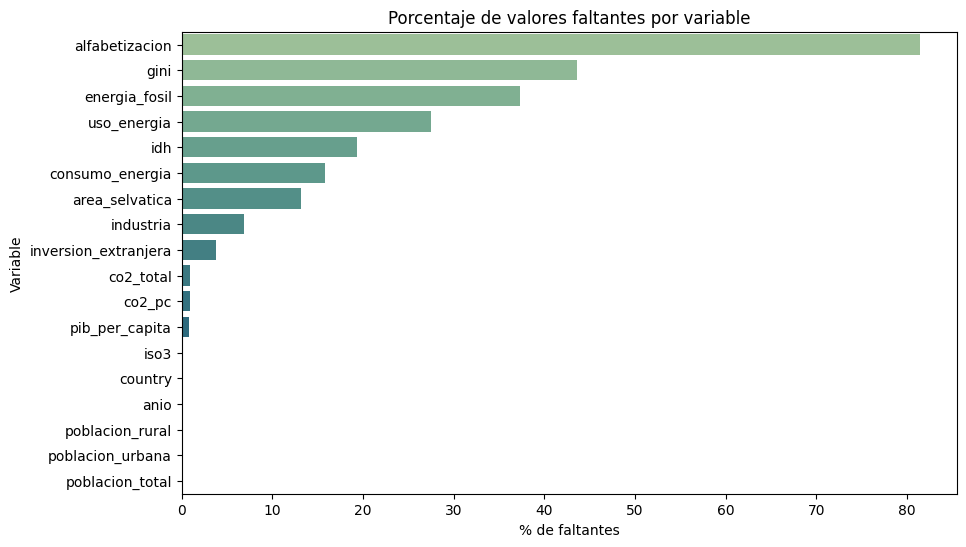

Variable  Porcentaje_faltantes
0         alfabetizacion             81.419458
1                   gini             43.620415
2          energia_fosil             37.320574
3            uso_energia             27.511962
4                    idh             19.377990
5        consumo_energia             15.789474
6         area_selvatica             13.157895
7              industria              6.858054
8   inversion_extranjera              3.827751
9              co2_total              0.956938
10                co2_pc              0.956938
11        pib_per_capita              0.797448
12                  iso3              0.000000
13               country              0.000000
14                  anio              0.000000
15       poblacion_rural              0.000000
16      poblacion_urbana              0.000000
17       poblacion_total              0.000000

In [ ]:
# === ANÁLISIS DE COMPLETITUD GENERAL ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Porcentaje de valores faltantes por variable
missing_pct = df.isnull().mean().sort_values(ascending=False) * 100
missing_df = missing_pct.reset_index()
missing_df.columns = ['Variable', 'Porcentaje_faltantes']

# Gráfico 1: porcentaje de faltantes por variable
plt.figure(figsize=(10,6))
sns.barplot(y='Variable', x='Porcentaje_faltantes', data=missing_df, palette='crest')
plt.title('Porcentaje de valores faltantes por variable')
plt.xlabel('% de faltantes')
plt.ylabel('Variable')
plt.show()

missing_df


/tmp/ipython-input-3368569787.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_completeness.values, y=country_completeness.index, palette='viridis')


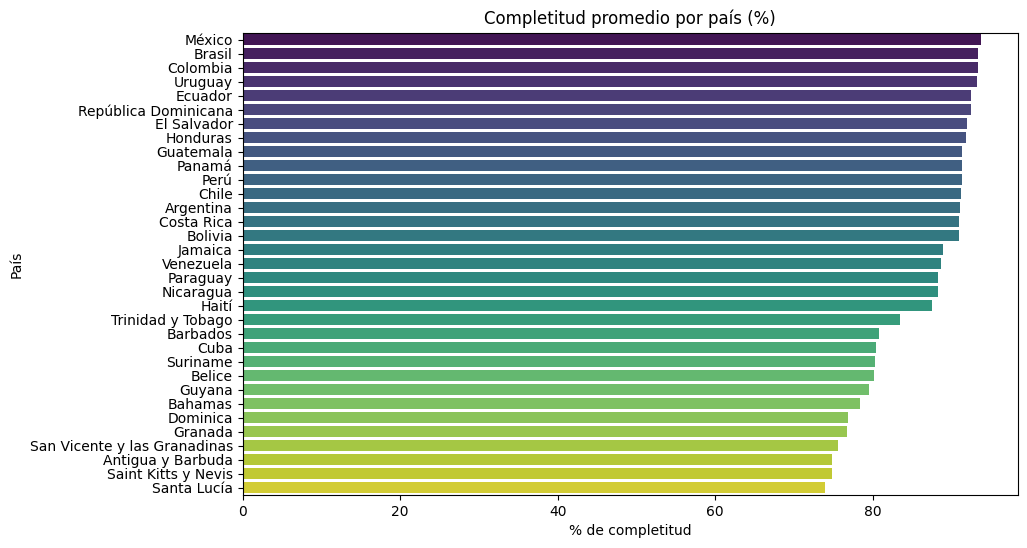

country
México                          93.713450
Brasil                          93.421053
Colombia                        93.421053
Uruguay                         93.274854
Ecuador                         92.543860
República Dominicana            92.543860
El Salvador                     91.959064
Honduras                        91.812865
Guatemala                       91.374269
Panamá                          91.374269
Perú                            91.374269
Chile                           91.228070
Argentina                       91.081871
Costa Rica                      90.935673
Bolivia                         90.935673
Jamaica                         88.888889
Venezuela                       88.742690
Paraguay                        88.304094
Nicaragua                       88.304094
Haití                           87.573099
Trinidad y Tobago               83.479532
Barbados                        80.847953
Cuba                            80.409357
Suriname                        80.263158
Belice                          80.116959
Guyana                          79.532164
Bahamas                         78.362573
Dominica                        76.900585
Granada                         76.754386
San Vicente y las Granadinas    75.584795
Antigua y Barbuda               74.853801
Saint Kitts y Nevis             74.853801
Santa Lucía                     73.976608
dtype: float64

In [ ]:
# === COMPLETITUD POR PAÍS ===

# Calcular el porcentaje de completitud (1 - proporción de faltantes)
country_completeness = 100 * (1 - df.isnull().groupby(df['country']).mean().mean(axis=1))
country_completeness = country_completeness.sort_values(ascending=False)

# Gráfico 2: completitud por país
plt.figure(figsize=(10,6))
sns.barplot(x=country_completeness.values, y=country_completeness.index, palette='viridis')
plt.title('Completitud promedio por país (%)')
plt.xlabel('% de completitud')
plt.ylabel('País')
plt.show()

country_completeness


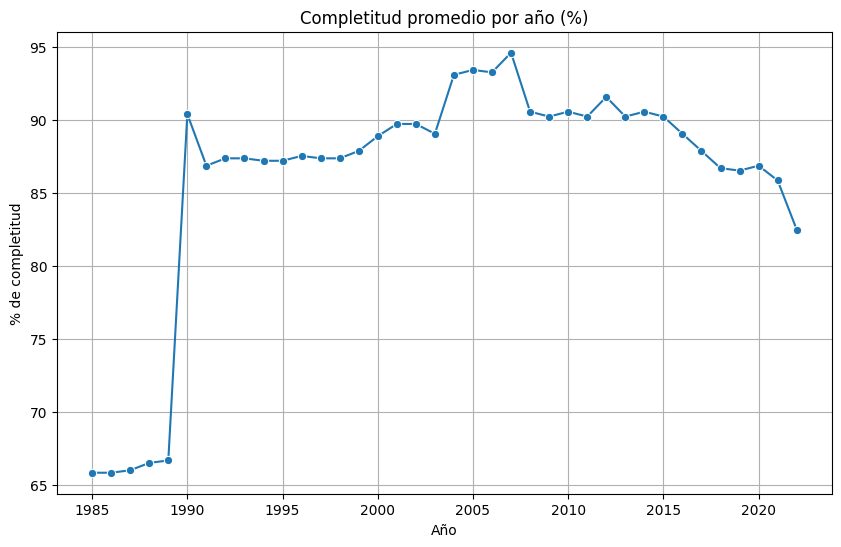

anio
1985    65.824916
1986    65.824916
1987    65.993266
1988    66.498316
1989    66.666667
1990    90.404040
1991    86.868687
1992    87.373737
1993    87.373737
1994    87.205387
1995    87.205387
1996    87.542088
1997    87.373737
1998    87.373737
1999    87.878788
2000    88.888889
2001    89.730640
2002    89.730640
2003    89.057239
2004    93.097643
2005    93.434343
2006    93.265993
2007    94.612795
2008    90.572391
2009    90.235690
2010    90.572391
2011    90.235690
2012    91.582492
2013    90.235690
2014    90.572391
2015    90.235690
2016    89.057239
2017    87.878788
2018    86.700337
2019    86.531987
2020    86.868687
2021    85.858586
2022    82.491582
dtype: float64

In [ ]:
# === COMPLETITUD POR AÑO ===
year_completeness = 100 * (1 - df.isnull().groupby(df['anio']).mean().mean(axis=1))

plt.figure(figsize=(10,6))
sns.lineplot(x=year_completeness.index, y=year_completeness.values, marker='o')
plt.title('Completitud promedio por año (%)')
plt.xlabel('Año')
plt.ylabel('% de completitud')
plt.grid(True)
plt.show()

year_completeness


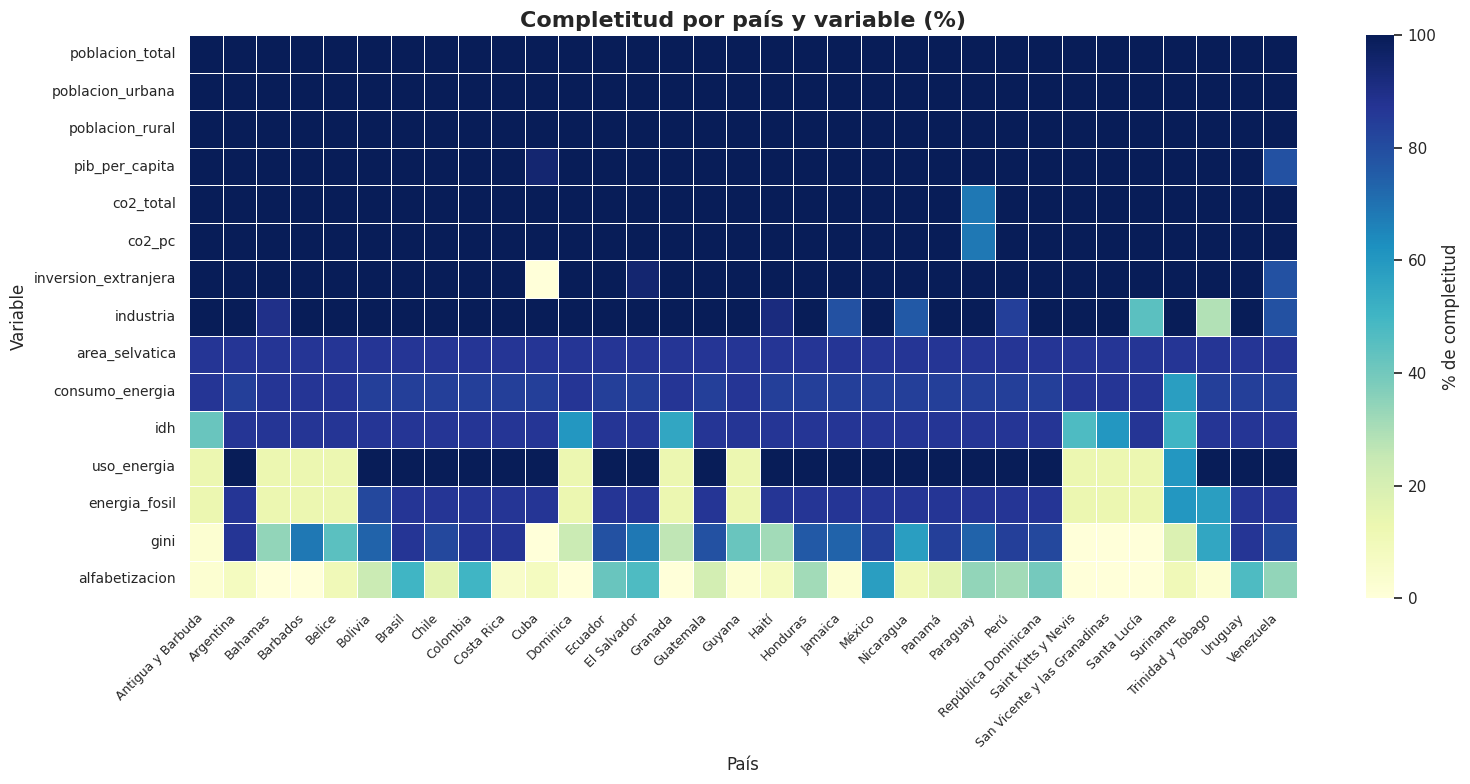

In [ ]:
# === HEATMAP MEJORADO: COMPLETITUD POR PAÍS Y VARIABLE ===
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seleccionar solo variables numéricas
vars_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

vars_numericas = [v for v in vars_numericas if v != "anio"]

# Calcular % de completitud
comp_pais_var = 100 * (1 - df.groupby('country')[vars_numericas].apply(lambda x: x.isnull().mean()))
comp_pais_var = comp_pais_var.round(1)

# Ordenar países por completitud promedio
comp_pais_var = comp_pais_var.loc[:, comp_pais_var.mean().sort_values(ascending=False).index]

# Crear figura
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Heatmap con bordes, paleta viva y etiquetas pequeñas
ax = sns.heatmap(
    comp_pais_var.T,
    cmap="YlGnBu",      # paleta de color más contrastante
    linewidths=0.5,
    linecolor="white",
    cbar_kws={'label': '% de completitud'},
    square=False,
    annot=False
)

plt.title('Completitud por país y variable (%)', fontsize=16, weight='bold')
plt.xlabel('País', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


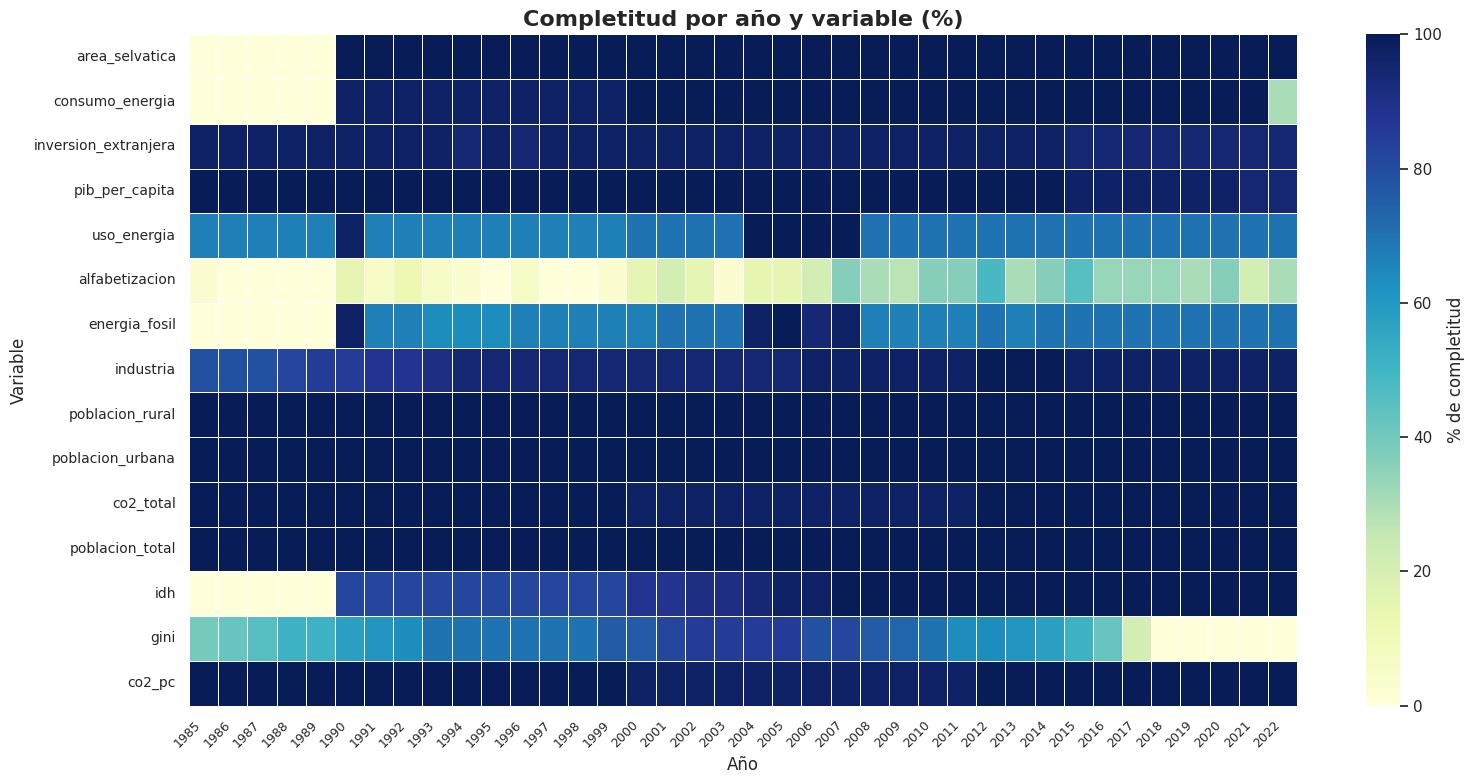

In [ ]:

# === HEATMAP MEJORADO: COMPLETITUD POR AÑO Y VARIABLE ===

vars_sin_anio = [v for v in vars_numericas if v != 'anio']

comp_anio_var = 100 * (1 - df.groupby('anio')[vars_sin_anio].apply(lambda x: x.isnull().mean()))
comp_anio_var = comp_anio_var.round(1)

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

ax = sns.heatmap(
    comp_anio_var.T,
    cmap="YlGnBu",
    linewidths=0.4,
    linecolor="white",
    cbar_kws={'label': '% de completitud'},
    square=False,
    annot=False
)

plt.title('Completitud por año y variable (%)', fontsize=16, weight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Dimensión final de la base filtrada: (527, 17)


/tmp/ipython-input-4134920481.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  completitud_pais = df_filtrado.groupby('country').apply(lambda x: x.notna().mean().mean() * 100)
/tmp/ipython-input-4134920481.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  completitud_anio = df_filtrado.groupby('anio').apply(lambda x: x.notna().mean().mean() * 100)
/tmp/ipython-input-4134920481.py:33: FutureWarning: 


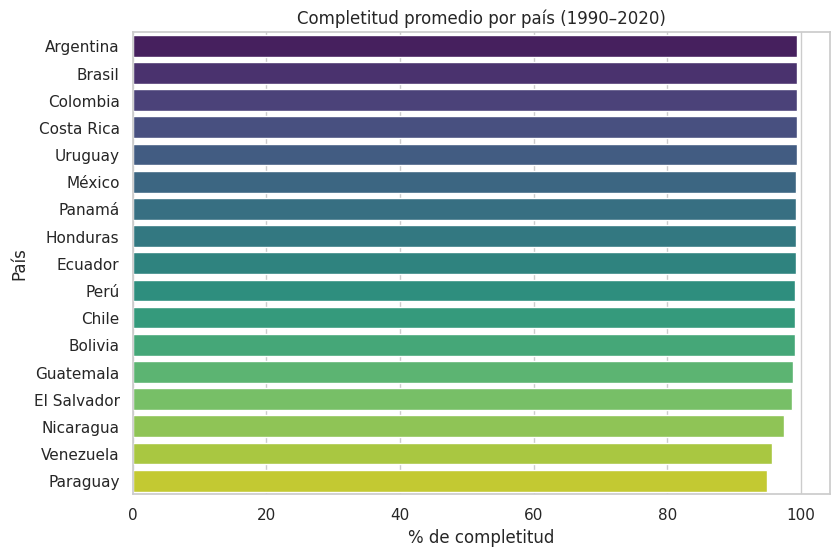

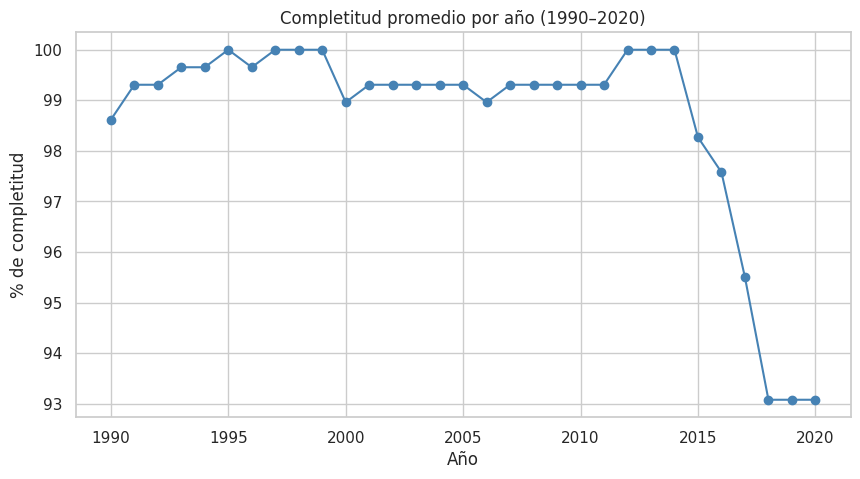

In [ ]:
# === FILTRADO DE DATOS SEGÚN CRITERIOS DE COBERTURA ===

# Lista de países seleccionados
paises_incluidos = [
    "Argentina", "Bolivia", "Brasil", "Chile", "Colombia", "Ecuador",
    "Paraguay", "Perú", "Uruguay", "Venezuela","México", "Panamá",
    "Costa Rica", "El Salvador", "Guatemala", "Honduras", "Nicaragua"
]

# Filtrar por países y rango temporal (1990–2020)
df_filtrado = df[df['country'].isin(paises_incluidos)]
df_filtrado = df_filtrado[(df_filtrado['anio'] >= 1990) & (df_filtrado['anio'] <= 2020)]

# Eliminar variable 'alfabetizacion' si existe
if 'alfabetizacion' in df_filtrado.columns:
    df_filtrado = df_filtrado.drop(columns=['alfabetizacion'])

print("Dimensión final de la base filtrada:", df_filtrado.shape)

# === NUEVA EVALUACIÓN DE COMPLETITUD ===
import seaborn as sns
import matplotlib.pyplot as plt

# Completitud promedio por país
completitud_pais = df_filtrado.groupby('country').apply(lambda x: x.notna().mean().mean() * 100)
completitud_pais = completitud_pais.sort_values(ascending=False)

# Completitud promedio por año
completitud_anio = df_filtrado.groupby('anio').apply(lambda x: x.notna().mean().mean() * 100)

# Gráfico 1: Completitud por país
plt.figure(figsize=(9,6))
sns.barplot(x=completitud_pais.values, y=completitud_pais.index, palette="viridis")
plt.xlabel("% de completitud")
plt.ylabel("País")
plt.title("Completitud promedio por país (1990–2020)")
plt.show()

# Gráfico 2: Completitud por año
plt.figure(figsize=(10,5))
plt.plot(completitud_anio.index, completitud_anio.values, marker='o', linestyle='-', color='steelblue')
plt.title("Completitud promedio por año (1990–2020)")
plt.xlabel("Año")
plt.ylabel("% de completitud")
plt.grid(True)
plt.show()


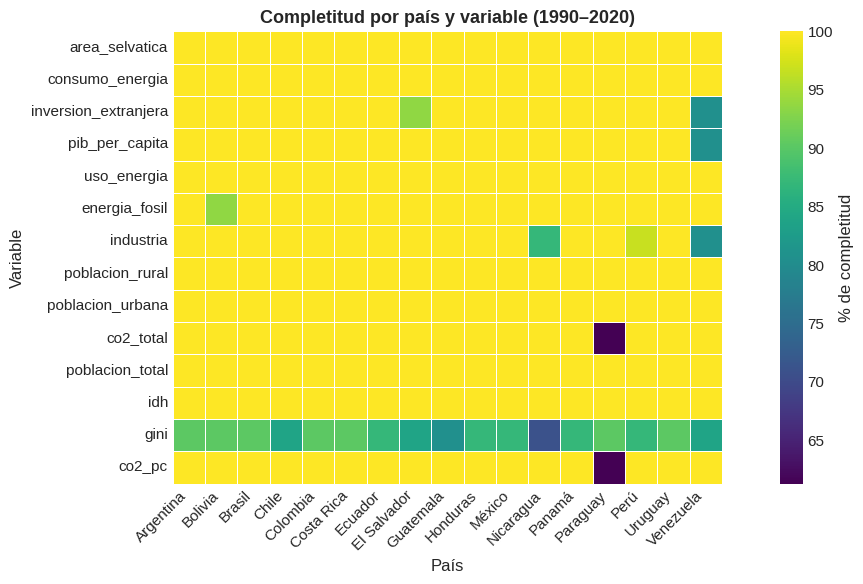

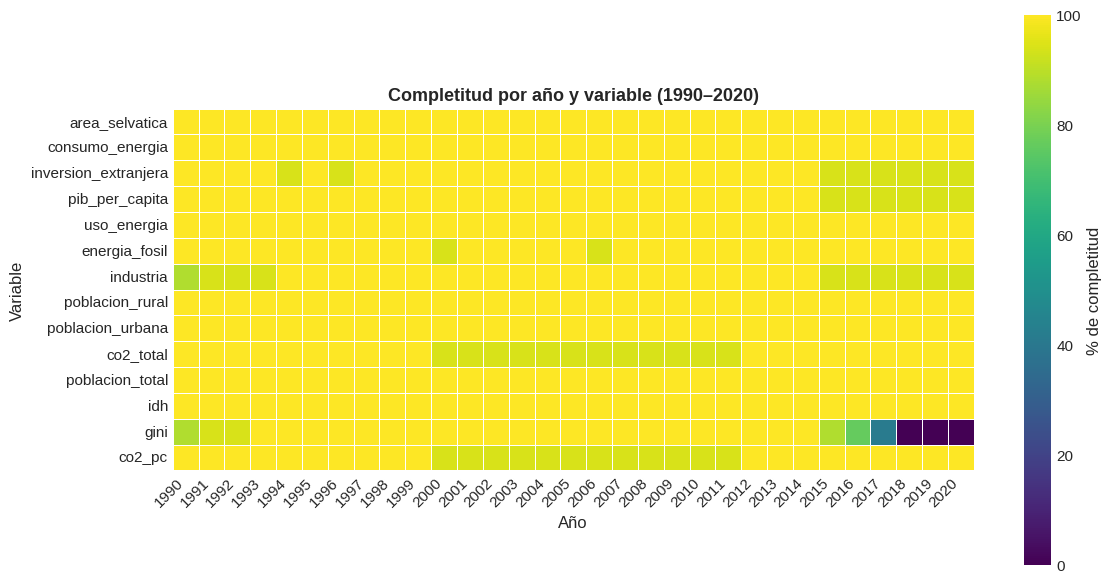

In [ ]:
# === MAPAS DE COMPLETITUD POR VARIABLE Y PAÍS / AÑO ===
import seaborn as sns
import matplotlib.pyplot as plt

# Variables que NO deben aparecer en heatmaps
columnas_excluir = ['country', 'iso3', 'anio']

# Variables que sí se evaluarán (todas menos las excluidas)
vars_utiles = [col for col in df_filtrado.columns if col not in columnas_excluir]

# Completitud por país y variable (%)
completitud_pais_var = df_filtrado.groupby("country")[vars_utiles].apply(lambda x: x.notna().mean() * 100).T

# Completitud por año y variable (%)
completitud_anio_var = df_filtrado.groupby("anio")[vars_utiles].apply(lambda x: x.notna().mean() * 100).T

# Configuración estética común
plt.style.use("seaborn-v0_8-whitegrid")
cmap = sns.color_palette("viridis", as_cmap=True)

# === Heatmap 1: Completitud por país y variable ===
plt.figure(figsize=(12,6))
sns.heatmap(completitud_pais_var, cmap=cmap, cbar_kws={'label': '% de completitud'},
            linewidths=0.5, square=True)
plt.title("Completitud por país y variable (1990–2020)", fontsize=13, weight='bold')
plt.xlabel("País")
plt.ylabel("Variable")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# === Heatmap 2: Completitud por año y variable ===
plt.figure(figsize=(12,6))
sns.heatmap(completitud_anio_var, cmap=cmap, cbar_kws={'label': '% de completitud'},
            linewidths=0.5, square=True)
plt.title("Completitud por año y variable (1990–2020)", fontsize=13, weight='bold')
plt.xlabel("Año")
plt.ylabel("Variable")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Porcentaje de valores faltantes por variable:
gini                    13.472486
co2_pc                   2.277040
co2_total                2.277040
industria                2.087287
inversion_extranjera     1.518027
pib_per_capita           1.138520
energia_fosil            0.379507
country                  0.000000
iso3                     0.000000
uso_energia              0.000000
anio                     0.000000
area_selvatica           0.000000
consumo_energia          0.000000
poblacion_urbana         0.000000
poblacion_rural          0.000000
idh                      0.000000
poblacion_total          0.000000
dtype: float64


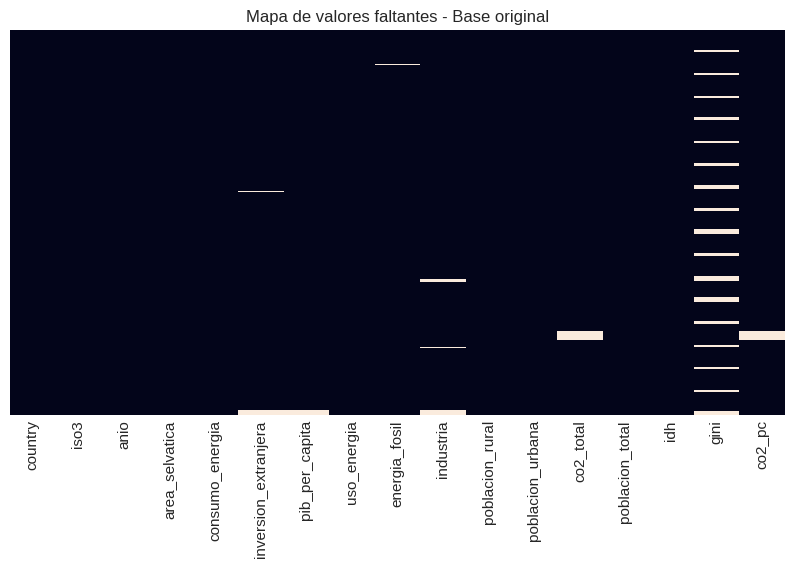

In [ ]:
# Revision de valores faltantes


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Usa tu base ya filtrada (1990–2020)
df_base = df_filtrado.copy()

# Revisión de faltantes
faltantes = df_base.isnull().mean().sort_values(ascending=False) * 100
print("Porcentaje de valores faltantes por variable:")
print(faltantes)

# Visualización general
plt.figure(figsize=(10,5))
sns.heatmap(df_base.isnull(), cbar=False, yticklabels=False)
plt.title("Mapa de valores faltantes - Base original")
plt.show()


## **METODO 1**

In [ ]:
# Asegurar orden correcto
df_filtrado = df_filtrado.sort_values(by=['country', 'anio']).reset_index(drop=True)

# Convertir todo lo posible a numérico
for col in df_filtrado.columns:
    if col not in ['country']:
        df_filtrado[col] = pd.to_numeric(df_filtrado[col], errors='coerce')


In [ ]:
df_interp = df_filtrado.copy()

for col in df_interp.select_dtypes(include='number').columns:
    df_interp[col] = df_interp.groupby('country')[col].transform(
        lambda x: x.interpolate(method='linear', limit_direction='both')
    )


In [ ]:
# Comprobación de la Imputación
faltantes_original = df_filtrado.isnull().mean() * 100
faltantes_interp = df_interp.isnull().mean() * 100

comparacion_faltantes = pd.DataFrame({
    'Antes de imputar (%)': faltantes_original.round(2),
    'Después de interpolar (%)': faltantes_interp.round(2)
}).sort_values('Antes de imputar (%)', ascending=False)

print(comparacion_faltantes)


                      Antes de imputar (%)  Después de interpolar (%)
iso3                                100.00                      100.0
gini                                 13.47                        0.0
co2_total                             2.28                        0.0
co2_pc                                2.28                        0.0
industria                             2.09                        0.0
inversion_extranjera                  1.52                        0.0
pib_per_capita                        1.14                        0.0
energia_fosil                         0.38                        0.0
country                               0.00                        0.0
uso_energia                           0.00                        0.0
anio                                  0.00                        0.0
area_selvatica                        0.00                        0.0
consumo_energia                       0.00                        0.0
poblacion_urbana    

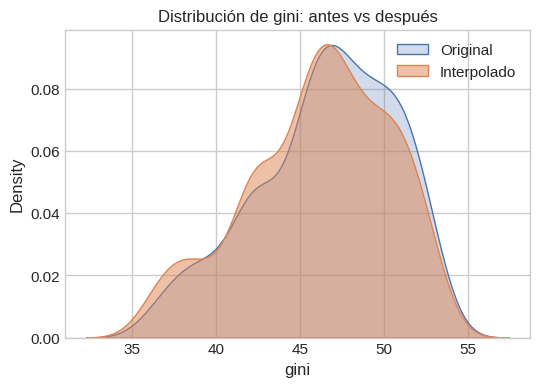

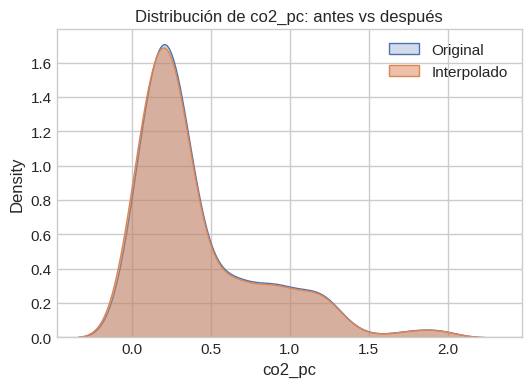

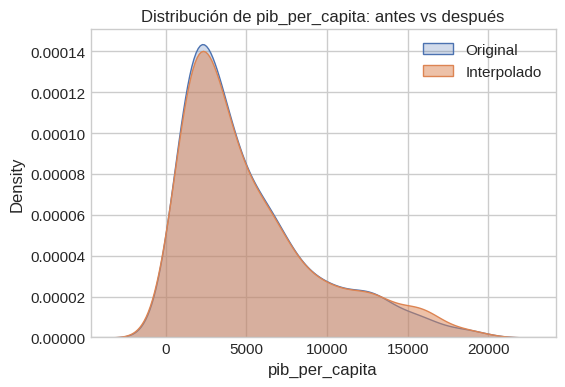

In [ ]:
# Comportamiento de las variables antes y despues de interpolacion

variables = ['gini', 'co2_pc', 'pib_per_capita']

for var in variables:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df_filtrado[var], label='Original', fill=True)
    sns.kdeplot(df_interp[var], label='Interpolado', fill=True, alpha=0.5)
    plt.title(f"Distribución de {var}: antes vs después")
    plt.legend()
    plt.show()



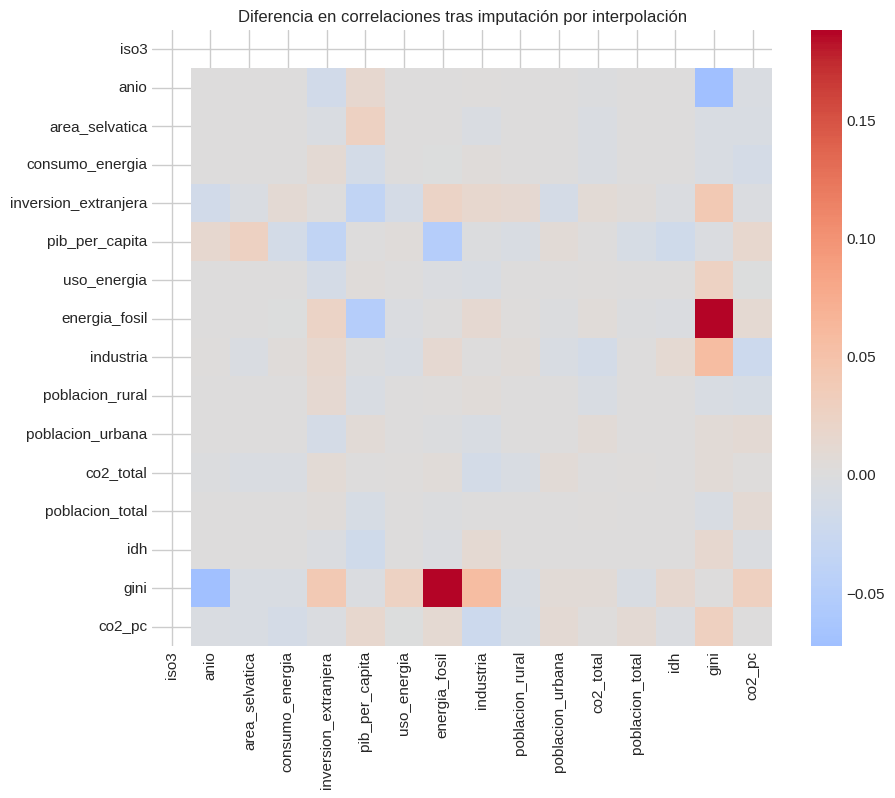

In [ ]:

corr_before = df_filtrado.corr(numeric_only=True)
corr_after = df_interp.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr_after - corr_before, cmap='coolwarm', center=0, annot=False)
plt.title("Diferencia en correlaciones tras imputación por interpolación")
plt.show()


# **Estadisticas luego de Interpolacion**


In [ ]:
df_interp['gini'].isnull().sum(), df_interp['gini'].dtype, df_interp['gini'].nunique()


(np.int64(0), dtype('float64'), 152)

In [ ]:
df_interp.groupby('country')['gini'].agg(['min','max','mean'])


min   max       mean
country                           
Argentina    37.3  46.4  41.774194
Bolivia      42.1  53.1  47.645161
Brasil       45.0  53.8  49.400000
Chile        44.7  48.5  46.629032
Colombia     47.9  52.1  50.470968
Costa Rica   40.8  46.3  44.422581
Ecuador      41.8  49.9  46.332258
El Salvador  38.3  46.9  43.174194
Guatemala    42.7  50.9  47.445161
Honduras     47.3  52.3  49.461290
México       44.8  47.9  46.364516
Nicaragua    42.6  50.2  45.858065
Panamá       46.5  51.3  49.083871
Paraguay     42.5  50.6  47.264516
Perú         44.3  53.0  49.241935
Uruguay      35.9  41.8  38.806452
Venezuela    36.9  42.9  39.922581

In [ ]:
faltantes = df_interp.isnull().mean() * 100
print("Porcentaje de faltantes después de interpolar:\n", faltantes)

df_interp.groupby('country')['gini'].agg(['min','max','mean']).head()


Porcentaje de faltantes después de interpolar:
 country                   0.0
iso3                    100.0
anio                      0.0
area_selvatica            0.0
consumo_energia           0.0
inversion_extranjera      0.0
pib_per_capita            0.0
uso_energia               0.0
energia_fosil             0.0
industria                 0.0
poblacion_rural           0.0
poblacion_urbana          0.0
co2_total                 0.0
poblacion_total           0.0
idh                       0.0
gini                      0.0
co2_pc                    0.0
dtype: float64


min   max       mean
country                         
Argentina  37.3  46.4  41.774194
Bolivia    42.1  53.1  47.645161
Brasil     45.0  53.8  49.400000
Chile      44.7  48.5  46.629032
Colombia   47.9  52.1  50.470968

In [ ]:
# Revisar intersección de países
print("Paises en df_filtrado:", sorted(df_filtrado['country'].unique()))
print("Paises en df_interp:", sorted(df_interp['country'].unique()))


Paises en df_filtrado: ['Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Costa Rica', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'México', 'Nicaragua', 'Panamá', 'Paraguay', 'Perú', 'Uruguay', 'Venezuela']
Paises en df_interp: ['Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Costa Rica', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'México', 'Nicaragua', 'Panamá', 'Paraguay', 'Perú', 'Uruguay', 'Venezuela']


In [ ]:
df_filtrado = df_filtrado.sort_values(by=['country','anio'])
df_interp = df_interp.sort_values(by=['country','anio'])


In [ ]:
df_filtrado['anio'] = pd.to_numeric(df_filtrado['anio'], errors='coerce')
df_interp['anio'] = pd.to_numeric(df_interp['anio'], errors='coerce')


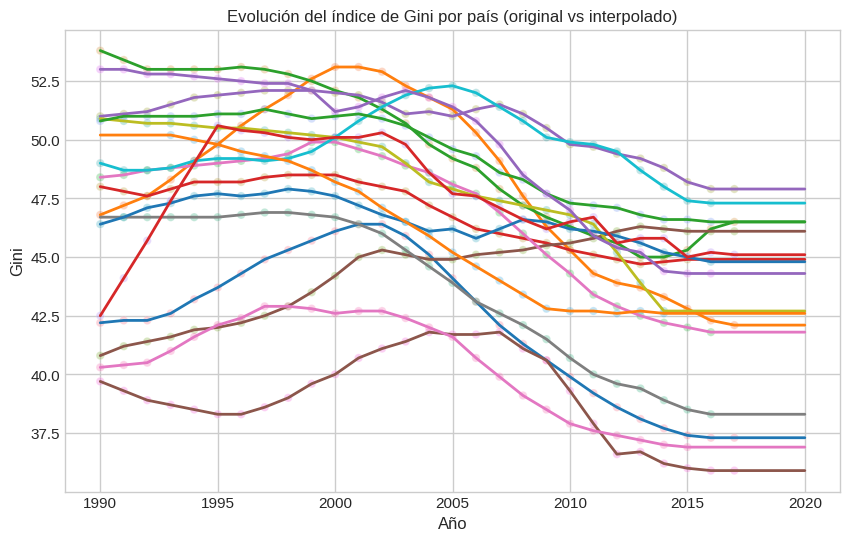

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_filtrado, x='anio', y='gini', hue='country',
    alpha=0.3, legend=False, color='gray'
)
sns.lineplot(
    data=df_interp, x='anio', y='gini', hue='country',
    lw=2, legend=False, palette='tab10'
)
plt.title("Evolución del índice de Gini por país (original vs interpolado)")
plt.xlabel("Año")
plt.ylabel("Gini")
plt.show()


#**Comportamiento de GINI**

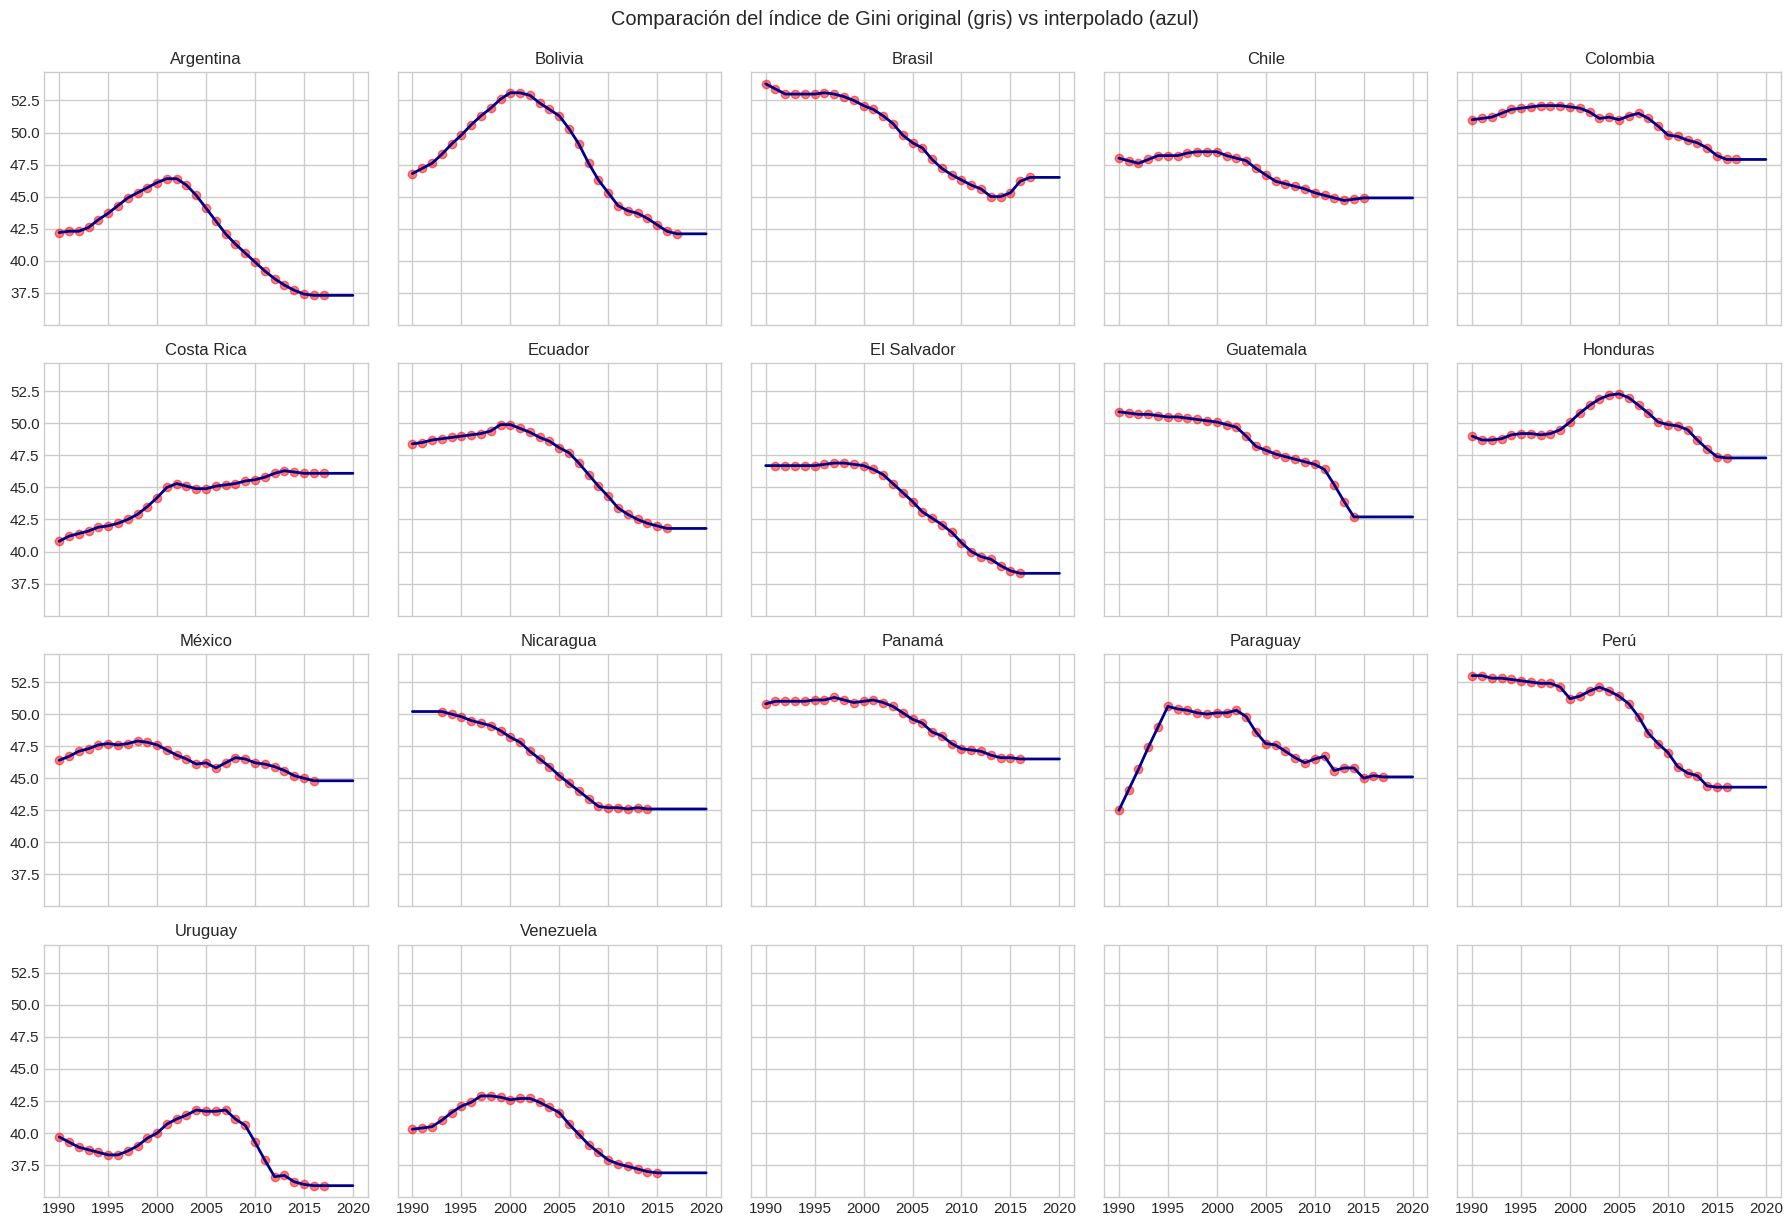

In [ ]:
countries = sorted(df_interp['country'].unique())
n = len(countries)

cols = 5
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(18, rows*3), sharex=True, sharey=True)
axes = axes.flatten()

for i, country in enumerate(countries):
    subset_orig = df_filtrado[df_filtrado['country']==country]
    subset_interp = df_interp[df_interp['country']==country]

    # Datos originales como puntos grises
    axes[i].scatter(subset_orig['anio'], subset_orig['gini'], color='red', alpha=0.5, label='Original')

    # Serie interpolada como línea azul
    axes[i].plot(subset_interp['anio'], subset_interp['gini'], color='darkblue', lw=2, label='Interpolada')

    axes[i].set_title(country)
    axes[i].legend().set_visible(False)

plt.tight_layout()
plt.suptitle("Comparación del índice de Gini original (gris) vs interpolado (azul)", y=1.02)
plt.show()


#**Comportamiento de PIB PER CAPITA**

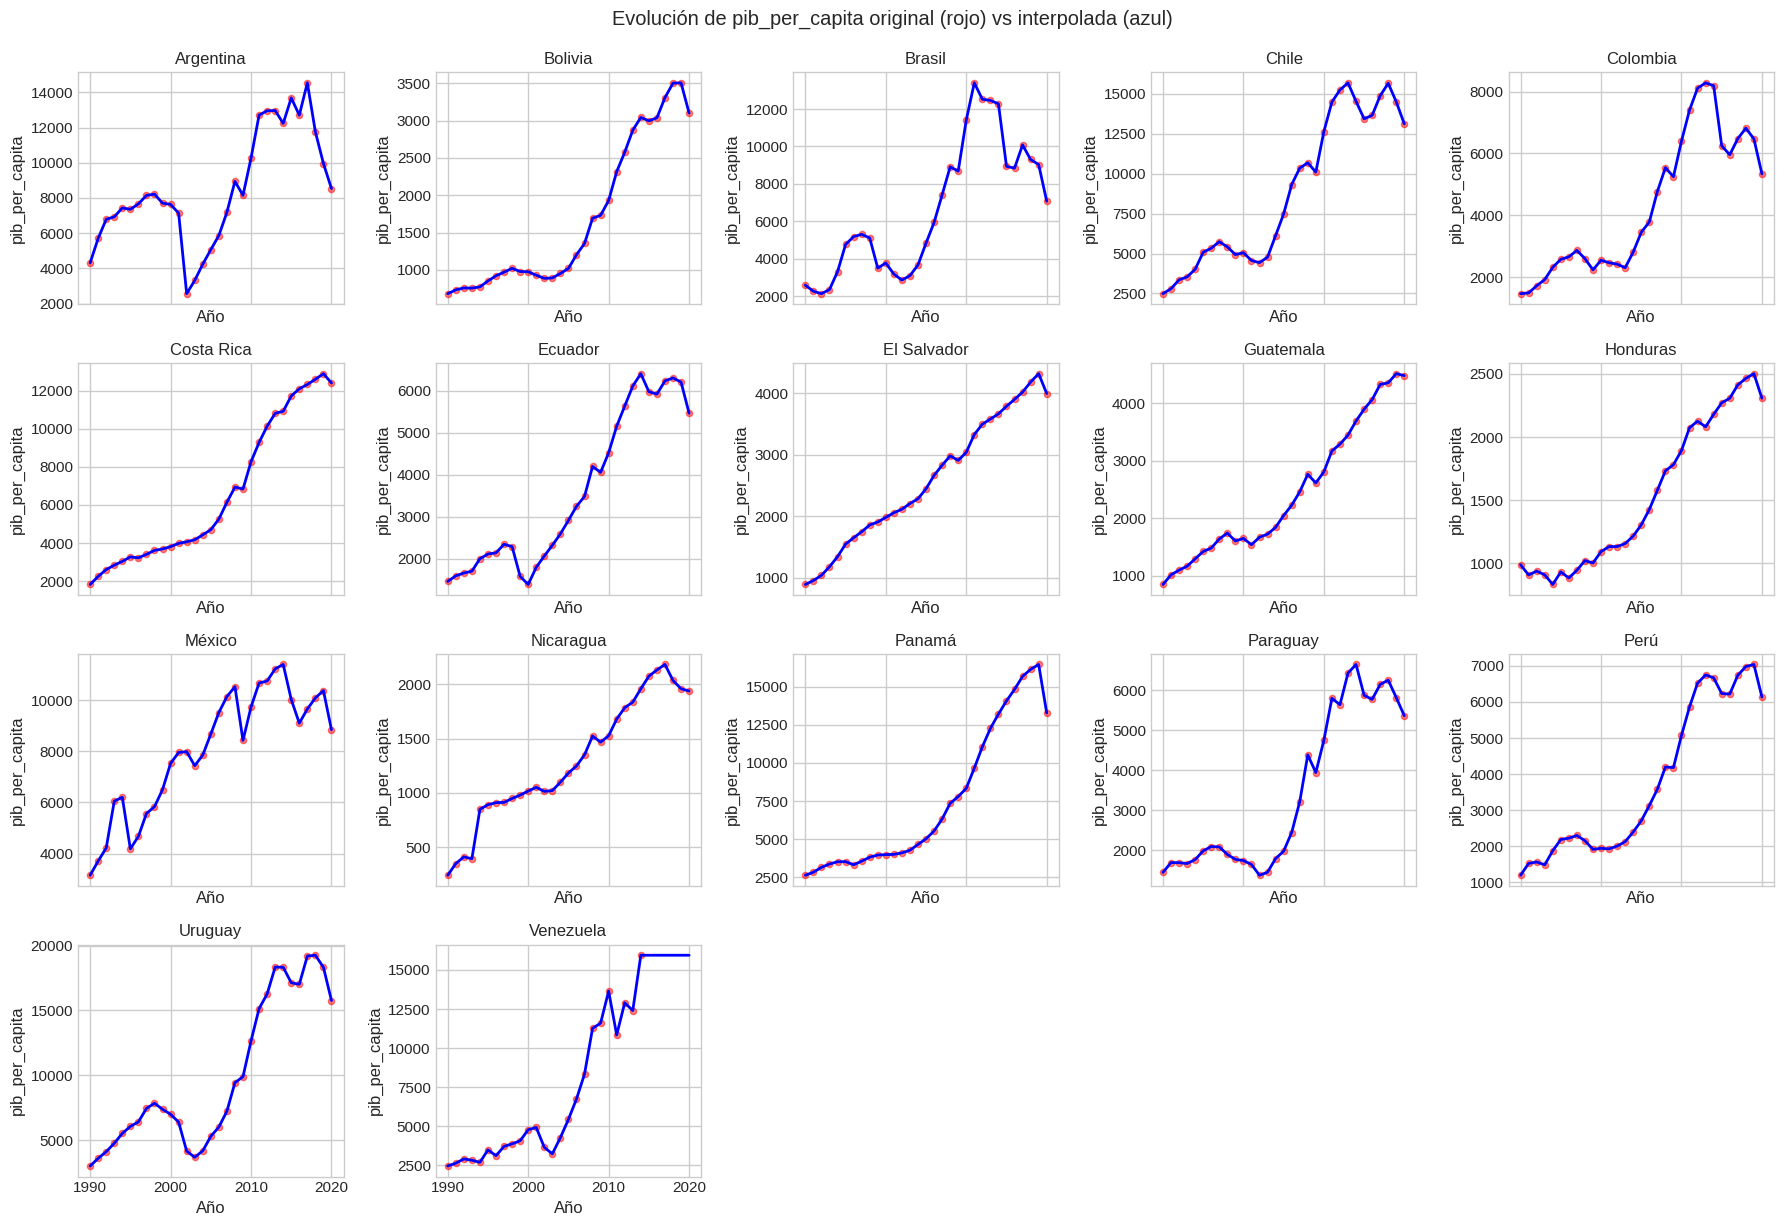

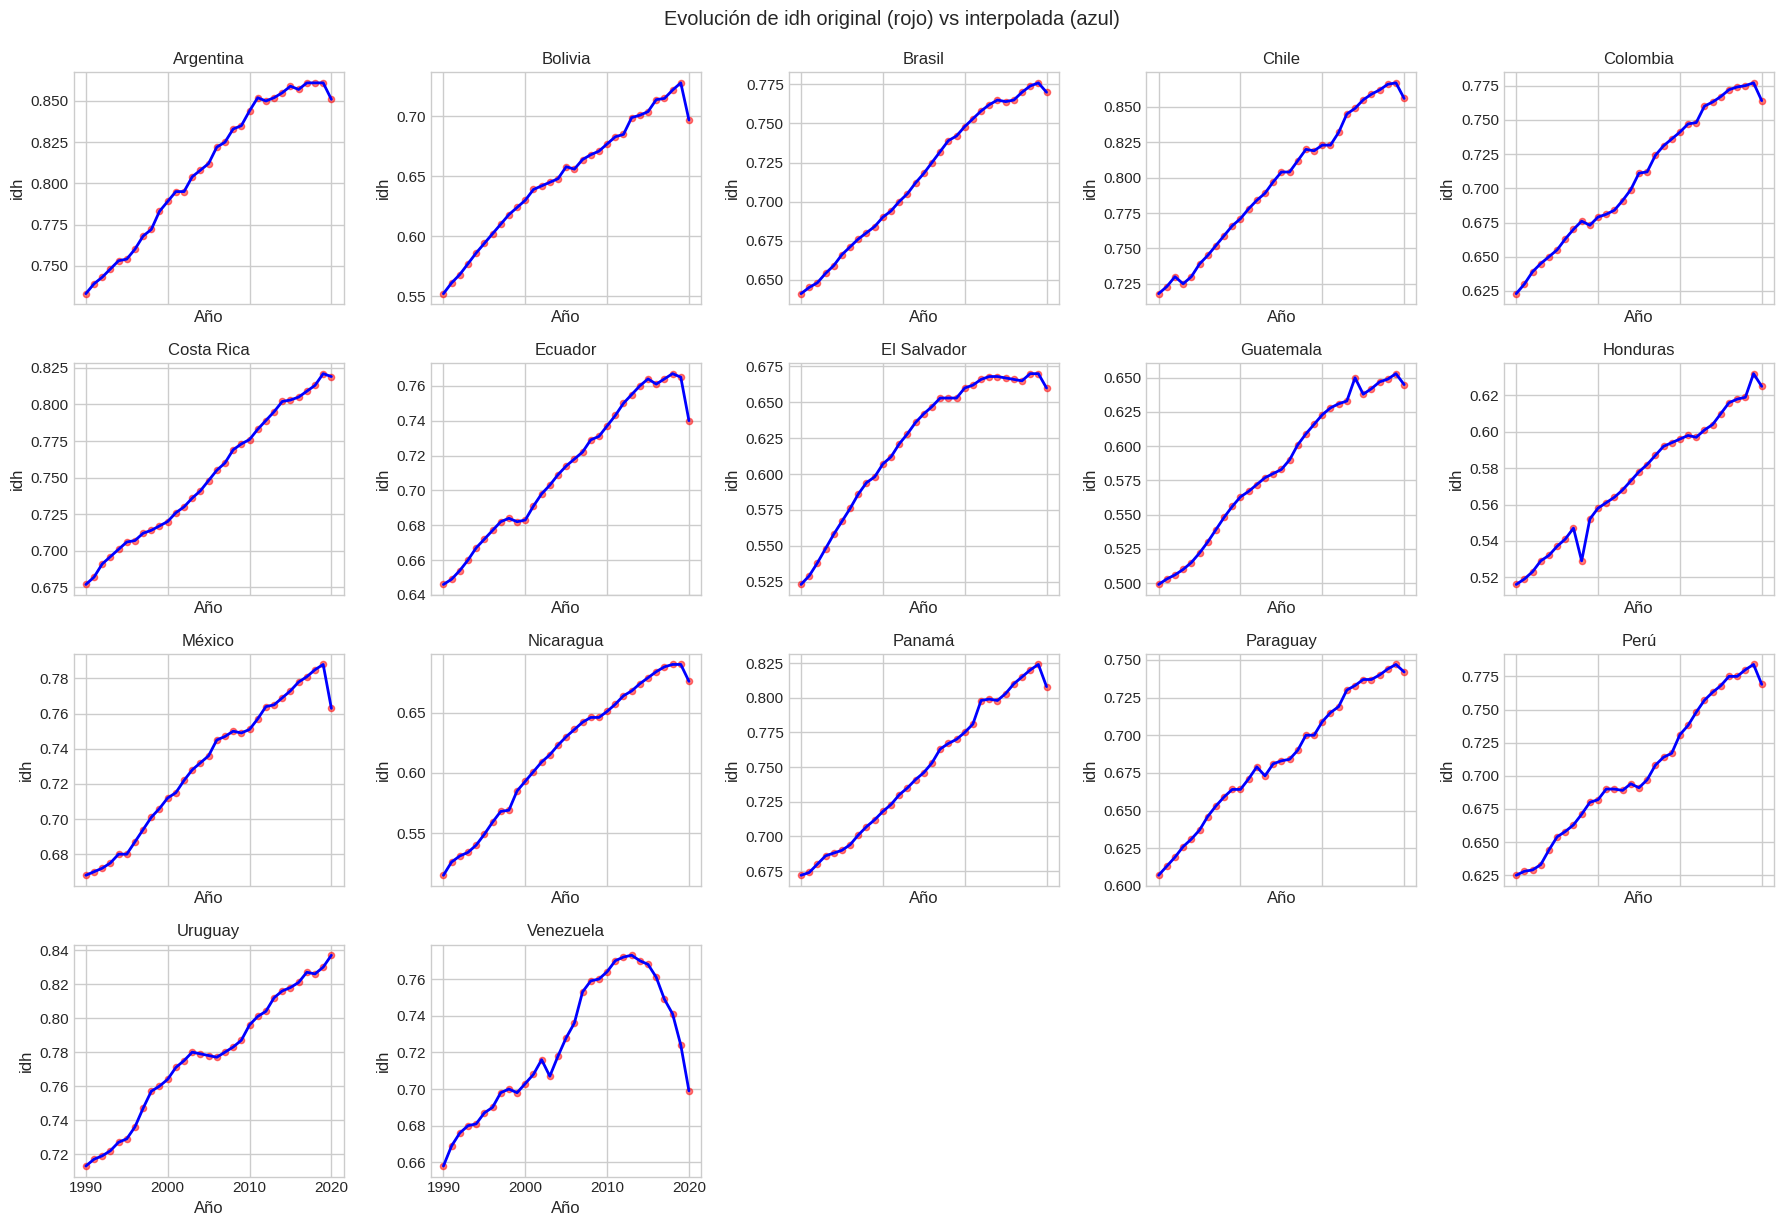

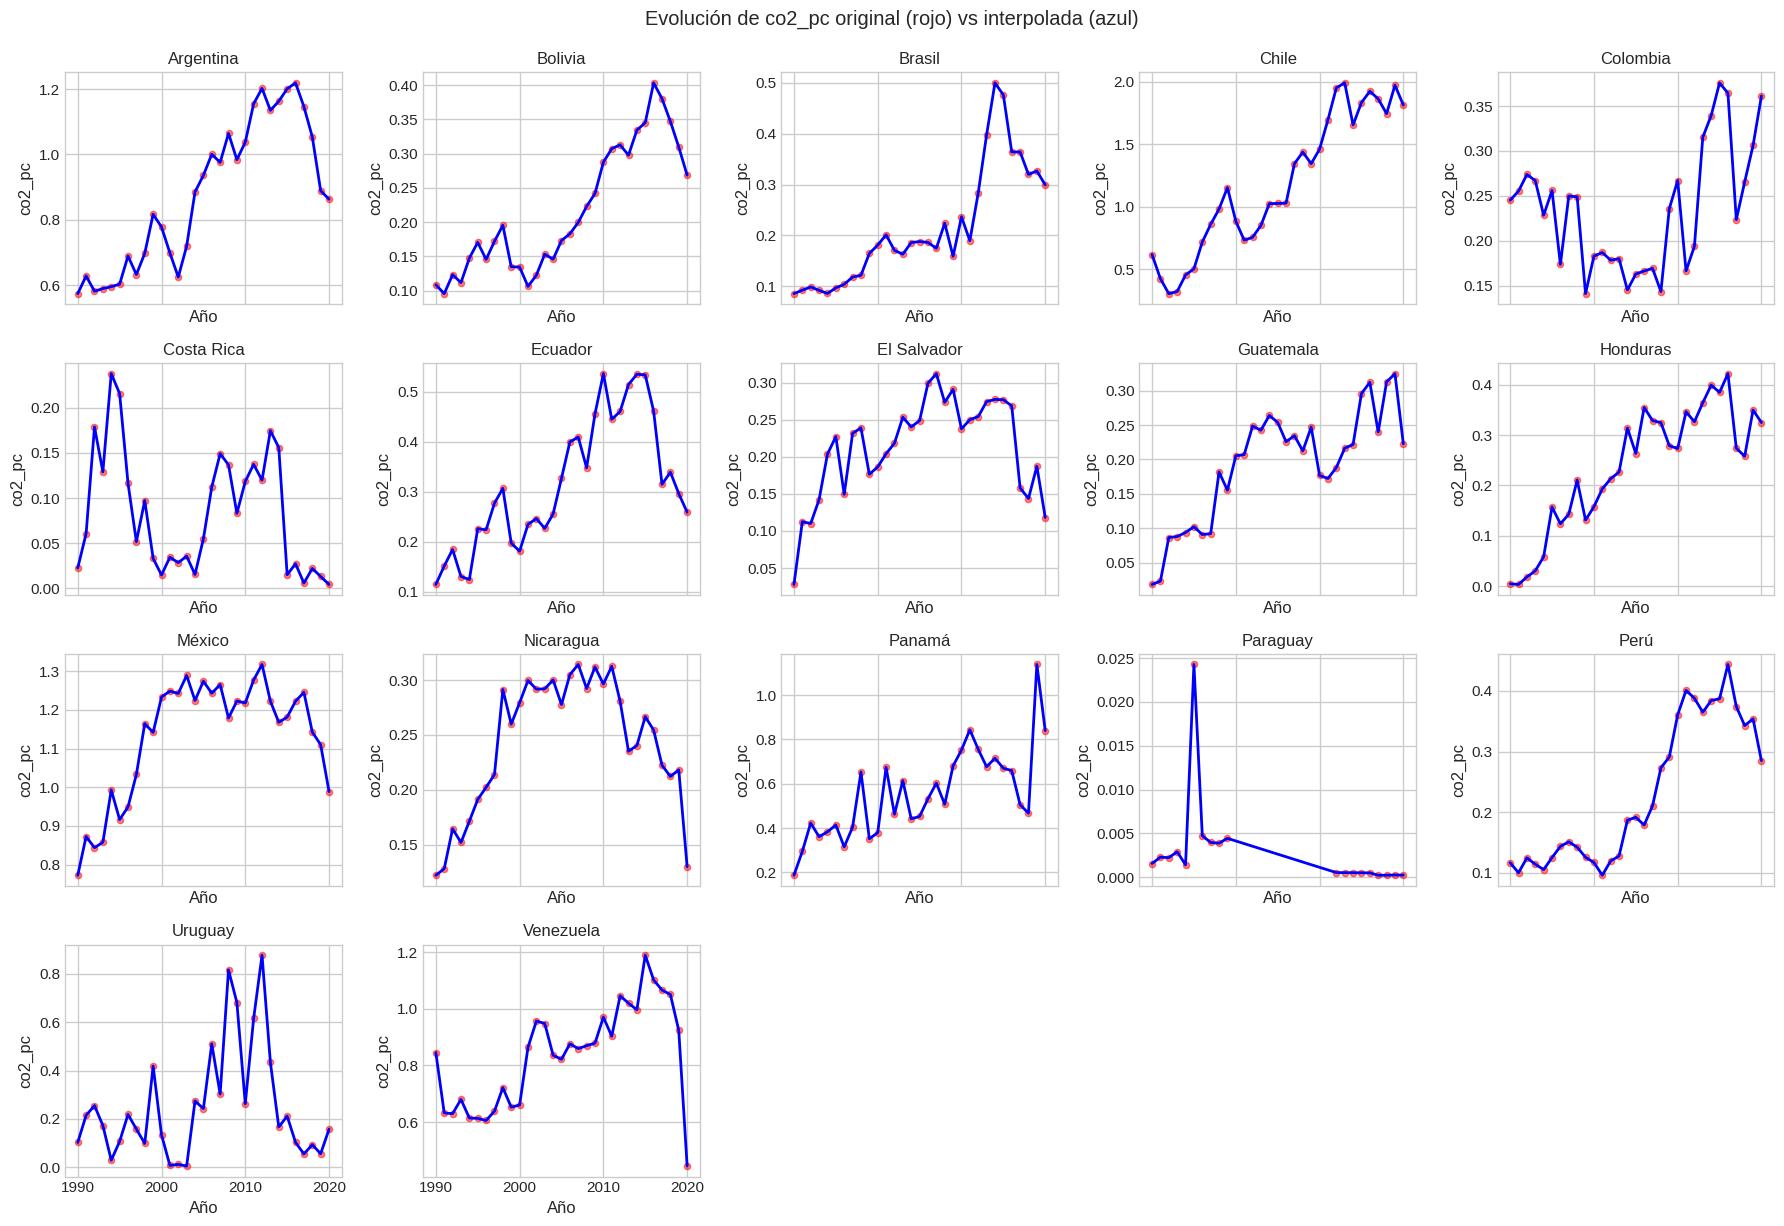

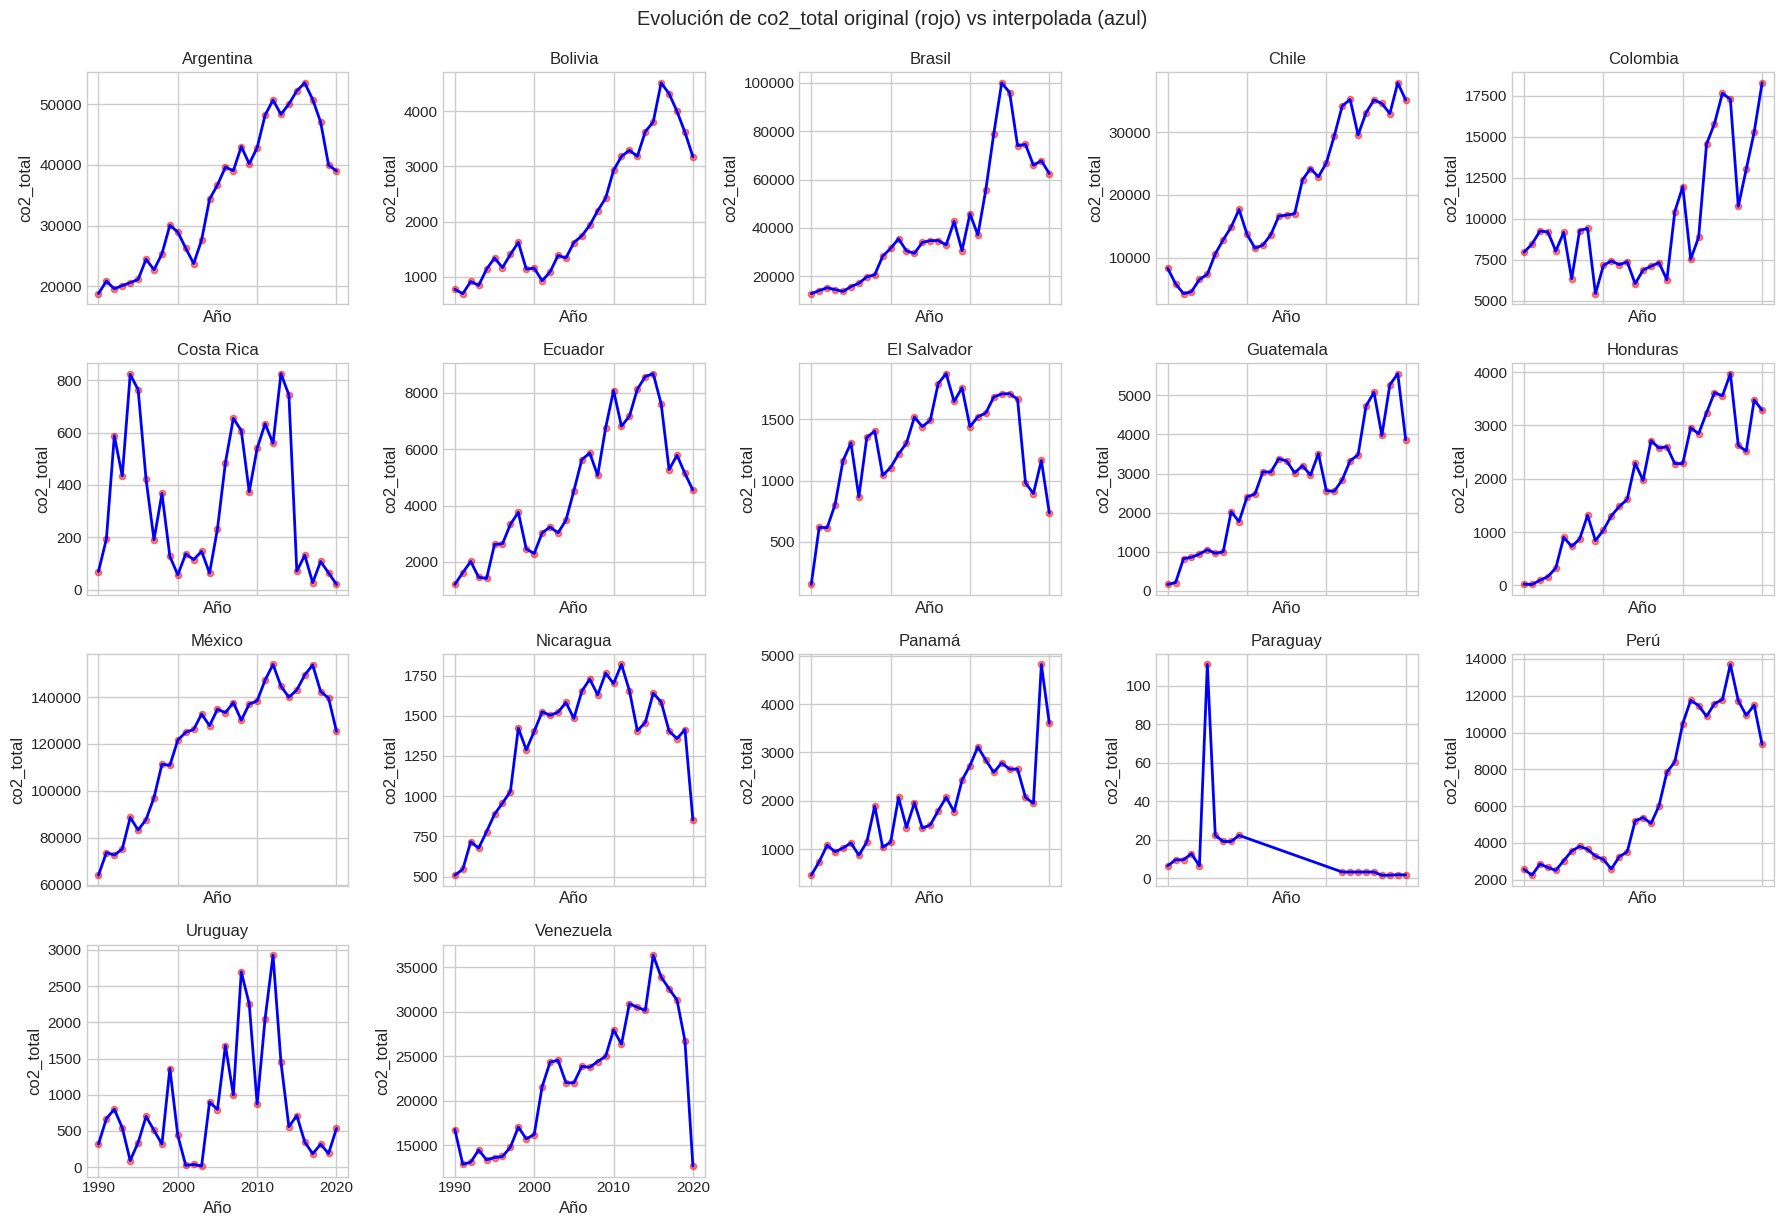

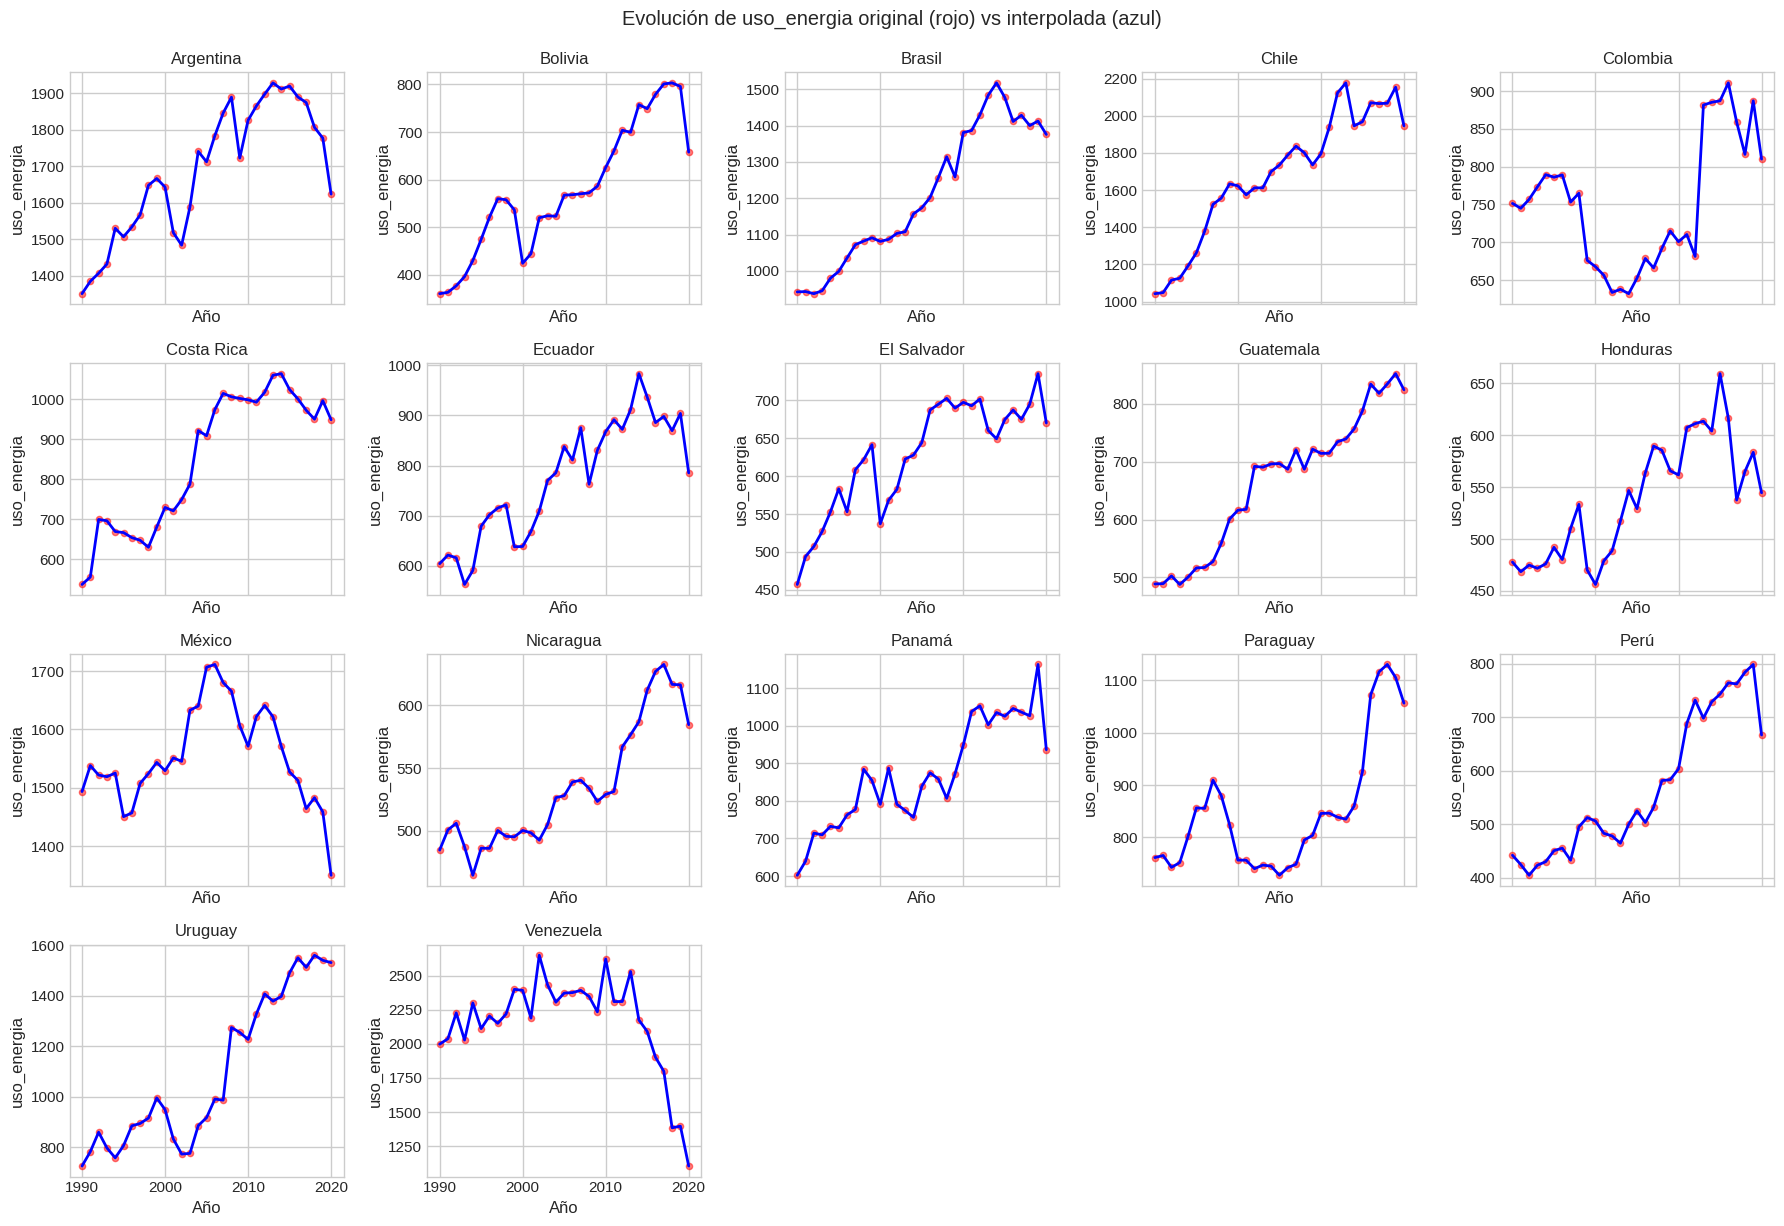

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

variables = ['pib_per_capita', 'idh', 'co2_pc', 'co2_total', 'uso_energia']

countries = sorted(df_interp['country'].unique())
n = len(countries)

cols = 5
rows = int(np.ceil(n / cols))  # número dinámico de filas

for var in variables:

    fig, axes = plt.subplots(rows, cols, figsize=(18, rows*3), sharex=True, sharey=False)
    axes = axes.flatten()

    for i, country in enumerate(countries):
        subset_orig = df_filtrado[df_filtrado['country'] == country]
        subset_interp = df_interp[df_interp['country'] == country]

        axes[i].scatter(subset_orig['anio'], subset_orig[var], color='red', alpha=0.5, s=20)
        axes[i].plot(subset_interp['anio'], subset_interp[var], color='blue', lw=2)
        axes[i].set_title(country)
        axes[i].set_xlabel('Año')
        axes[i].set_ylabel(var)

    # Ocultar subplots vacíos (si sobran)
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.suptitle(f"Evolución de {var} original (rojo) vs interpolada (azul)", y=1.02)
    plt.show()


In [ ]:
conteo_pais_var = df_interp.groupby('country').count().T
conteo_pais_var


country               Argentina  Bolivia  Brasil  Chile  Colombia  Costa Rica  \
iso3                          0        0       0      0         0           0   
anio                         31       31      31     31        31          31   
area_selvatica               31       31      31     31        31          31   
consumo_energia              31       31      31     31        31          31   
inversion_extranjera         31       31      31     31        31          31   
pib_per_capita               31       31      31     31        31          31   
uso_energia                  31       31      31     31        31          31   
energia_fosil                31       31      31     31        31          31   
industria                    31       31      31     31        31          31   
poblacion_rural              31       31      31     31        31          31   
poblacion_urbana             31       31      31     31        31          31   
co2_total                    31       31      31     31        31          31   
poblacion_total              31       31      31     31        31          31   
idh                          31       31      31     31        31          31   
gini                         31       31      31     31        31          31   
co2_pc                       31       31      31     31        31          31   

country               Ecuador  El Salvador  Guatemala  Honduras  México  \
iso3                        0            0          0         0       0   
anio                       31           31         31        31      31   
area_selvatica             31           31         31        31      31   
consumo_energia            31           31         31        31      31   
inversion_extranjera       31           31         31        31      31   
pib_per_capita             31           31         31        31      31   
uso_energia                31           31         31        31      31   
energia_fosil              31           31         31        31      31   
industria                  31           31         31        31      31   
poblacion_rural            31           31         31        31      31   
poblacion_urbana           31           31         31        31      31   
co2_total                  31           31         31        31      31   
poblacion_total            31           31         31        31      31   
idh                        31           31         31        31      31   
gini                       31           31         31        31      31   
co2_pc                     31           31         31        31      31   

country               Nicaragua  Panamá  Paraguay  Perú  Uruguay  Venezuela  
iso3                          0       0         0     0        0          0  
anio                         31      31        31    31       31         31  
area_selvatica               31      31        31    31       31         31  
consumo_energia              31      31        31    31       31         31  
inversion_extranjera         31      31        31    31       31         31  
pib_per_capita               31      31        31    31       31         31  
uso_energia                  31      31        31    31       31         31  
energia_fosil                31      31        31    31       31         31  
industria                    31      31        31    31       31         31  
poblacion_rural              31      31        31    31       31         31  
poblacion_urbana             31      31        31    31       31         31  
co2_total                    31      31        31    31       31         31  
poblacion_total              31      31        31    31       31         31  
idh                          31      31        31    31       31         31  
gini                         31      31        31    31       31         31  
co2_pc                       31      31        31    31       31         31

In [ ]:
df_interp['country'].value_counts()


country
Argentina      31
Bolivia        31
Brasil         31
Chile          31
Colombia       31
Costa Rica     31
Ecuador        31
El Salvador    31
Guatemala      31
Honduras       31
México         31
Nicaragua      31
Panamá         31
Paraguay       31
Perú           31
Uruguay        31
Venezuela      31
Name: count, dtype: int64

In [ ]:
df_interp.shape



(527, 17)

## **Evaluación de las Métricas de Imputación**

In [ ]:
import numpy as np
import pandas as pd

def validar_interpolacion(df, variables):
    resultados = {}

    for var in variables:
        # Copia del dataset
        df_test = df.copy()

        # Máscara: ocultar 10% del valor observado
        mask = df_test[var].notna() & (np.random.rand(len(df_test)) < 0.1)
        df_test.loc[mask, var] = np.nan

        # Interpolación lineal país–año
        df_interp = df_test.groupby('country').apply(
            lambda x: x.sort_values('anio').interpolate(method='linear')
        ).reset_index(drop=True)

        # Comparación real vs interpolado
        true_vals = df.loc[mask, var]
        pred_vals = df_interp.loc[mask, var]

        # Cálculo de métricas
        rmse = np.sqrt(((true_vals - pred_vals)**2).mean())
        mae = (true_vals - pred_vals).abs().mean()

        resultados[var] = {'RMSE': rmse, 'MAE': mae}

    return pd.DataFrame(resultados).T


In [ ]:
variables = ['gini', 'pib_per_capita', 'idh', 'co2_pc', 'co2_total', 'uso_energia']

resultados_interpolacion = validar_interpolacion(df_filtrado, variables)
print(resultados_interpolacion)


                       RMSE          MAE
gini               0.237031     0.132955
pib_per_capita   937.937844   490.994973
idh                0.004461     0.002512
co2_pc             0.045272     0.033481
co2_total       1726.862144  1129.936985
uso_energia       34.554488    22.621511


/tmp/ipython-input-3746063527.py:17: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  lambda x: x.sort_values('anio').interpolate(method='linear')
/tmp/ipython-input-3746063527.py:17: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  lambda x: x.sort_values('anio').interpolate(method='linear')
/tmp/ipython-input-3746063527.py:17: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  lambda x: x.sort_values('anio').interpolate(method='linear')
/tmp/ipython-input-3746063527.py:17: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interp

In [ ]:
df_interp.to_csv("base_depurada.csv", index=False)


In [ ]:
from google.colab import files
files.download("base_depurada.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **ANÁLISIS EXPLORATORIO DE DATOS**

In [ ]:
# === ETAPA 1: CARGA E INSPECCIÓN INICIAL ===

import pandas as pd
import numpy as np
from google.colab import files

# Subir archivo CSV desde tu computador
uploaded = files.upload()

# Cargar el archivo (toma el nombre automáticamente)
df_al = pd.read_csv(list(uploaded.keys())[0])

# Mostrar dimensiones y nombres de columnas
print("Dimensiones:", df.shape)
print("\nColumnas:\n", df.columns.tolist())

# Primeras filas
df_al.head()


Saving base_depurada.csv to base_depurada (3).csv
Dimensiones: (527, 17)

Columnas:
 ['country', 'iso3', 'anio', 'area_selvatica', 'consumo_energia', 'inversion_extranjera', 'pib_per_capita', 'uso_energia', 'energia_fosil', 'industria', 'poblacion_rural', 'poblacion_urbana', 'co2_total', 'poblacion_total', 'idh', 'gini', 'co2_pc']


country  iso3  anio  area_selvatica  consumo_energia  \
0  Argentina   NaN  1990       12.863715              8.6   
1  Argentina   NaN  1991       12.796992              8.4   
2  Argentina   NaN  1992       12.730269              9.0   
3  Argentina   NaN  1993       12.663546              9.7   
4  Argentina   NaN  1994       12.596823             10.0   

   inversion_extranjera  pib_per_capita  uso_energia  energia_fosil  \
0              1.298879     4315.334031  1351.482776      92.245977   
1              1.285579     5709.247841  1385.383070      91.648943   
2              1.936795     6789.996111  1407.276754      93.526987   
3              1.179803     6931.855964  1432.607503      89.757061   
4              1.411953     7437.562423  1530.527608      87.494408   

   industria  poblacion_rural  poblacion_urbana     co2_total  \
0  26.789705           13.016            86.984  18808.084681   
1  24.386449           12.672            87.328  20884.365095   
2  21.859132           12.458            87.542  19597.447111   
3  18.239912           12.248            87.752  20142.991093   
4  17.819092           12.040            87.960  20610.804709   

   poblacion_total    idh  gini    co2_pc  
0         32755901  0.733  42.2  0.574189  
1         33230294  0.739  42.3  0.628474  
2         33693527  0.743  42.3  0.581638  
3         34152717  0.748  42.6  0.589792  
4         34613491  0.753  43.2  0.595456

In [ ]:
import pandas as pd
import numpy as np

# Comprobaciones básicas
print("Dimensiones:", df_al.shape)
display(df_al.dtypes)
display(df_al.head(8))
# Resumen de nulos
print("\nNulos por columna:")
print(df_al.isna().sum().sort_values(ascending=False).head(20))


Dimensiones: (527, 17)


country                  object
iso3                    float64
anio                      int64
area_selvatica          float64
consumo_energia         float64
inversion_extranjera    float64
pib_per_capita          float64
uso_energia             float64
energia_fosil           float64
industria               float64
poblacion_rural         float64
poblacion_urbana        float64
co2_total               float64
poblacion_total           int64
idh                     float64
gini                    float64
co2_pc                  float64
dtype: object

country  iso3  anio  area_selvatica  consumo_energia  \
0  Argentina   NaN  1990       12.863715              8.6   
1  Argentina   NaN  1991       12.796992              8.4   
2  Argentina   NaN  1992       12.730269              9.0   
3  Argentina   NaN  1993       12.663546              9.7   
4  Argentina   NaN  1994       12.596823             10.0   
5  Argentina   NaN  1995       12.530100             10.2   
6  Argentina   NaN  1996       12.463377              8.6   
7  Argentina   NaN  1997       12.396654              9.7   

   inversion_extranjera  pib_per_capita  uso_energia  energia_fosil  \
0              1.298879     4315.334031  1351.482776      92.245977   
1              1.285579     5709.247841  1385.383070      91.648943   
2              1.936795     6789.996111  1407.276754      93.526987   
3              1.179803     6931.855964  1432.607503      89.757061   
4              1.411953     7437.562423  1530.527608      87.494408   
5              2.173928     7357.616277  1507.198475      89.047827   
6              2.553203     7663.212713  1534.091776      90.203183   
7              3.127878     8146.787100  1567.394448      89.190991   

   industria  poblacion_rural  poblacion_urbana     co2_total  \
0  26.789705           13.016            86.984  18808.084681   
1  24.386449           12.672            87.328  20884.365095   
2  21.859132           12.458            87.542  19597.447111   
3  18.239912           12.248            87.752  20142.991093   
4  17.819092           12.040            87.960  20610.804709   
5  17.246752           11.836            88.164  21160.781356   
6  17.535723           11.634            88.366  24485.407047   
7  18.227906           11.436            88.564  22743.940137   

   poblacion_total    idh  gini    co2_pc  
0         32755901  0.733  42.2  0.574189  
1         33230294  0.739  42.3  0.628474  
2         33693527  0.743  42.3  0.581638  
3         34152717  0.748  42.6  0.589792  
4         34613491  0.753  43.2  0.595456  
5         35070020  0.754  43.7  0.603387  
6         35513793  0.760  44.3  0.689462  
7         35947791  0.768  44.9  0.632694


Nulos por columna:
iso3                    527
country                   0
anio                      0
area_selvatica            0
consumo_energia           0
inversion_extranjera      0
pib_per_capita            0
uso_energia               0
energia_fosil             0
industria                 0
poblacion_rural           0
poblacion_urbana          0
co2_total                 0
poblacion_total           0
idh                       0
gini                      0
co2_pc                    0
dtype: int64


In [ ]:
# PASO 1 — Inspección inicial del dataset depurado

import pandas as pd
import numpy as np

# Ver tamaños generales del dataset
print("Dimensiones del dataset (filas, columnas):")
print(df_al.shape)

# Vista general de las primeras filas
print("\nPrimeras 10 filas del dataset:")
display(df_al.head(10))

# Información de tipos de datos y valores nulos
print("\nInformación del dataset:")
print(df_al.info())

# Conteo de valores faltantes por variable
print("\nValores faltantes por columna:")
print(df_al.isna().sum())

# Porcentaje de valores faltantes
print("\nPorcentaje de valores faltantes:")
print((df_al.isna().mean() * 100).round(2))

# Estadísticas descriptivas (solo numéricas)
print("\nEstadísticas descriptivas de variables numéricas:")
display(df_al.describe().T)

# Estadísticas para variables categóricas
print("\nFrecuencias de variables categóricas:")
for col in df_al.select_dtypes(include=['object', 'category']).columns:
    print(f"\nVariable: {col}")
    print(df_al[col].value_counts().head(10))


Dimensiones del dataset (filas, columnas):
(527, 17)

Primeras 10 filas del dataset:


country  iso3  anio  area_selvatica  consumo_energia  \
0  Argentina   NaN  1990       12.863715              8.6   
1  Argentina   NaN  1991       12.796992              8.4   
2  Argentina   NaN  1992       12.730269              9.0   
3  Argentina   NaN  1993       12.663546              9.7   
4  Argentina   NaN  1994       12.596823             10.0   
5  Argentina   NaN  1995       12.530100             10.2   
6  Argentina   NaN  1996       12.463377              8.6   
7  Argentina   NaN  1997       12.396654              9.7   
8  Argentina   NaN  1998       12.329931              9.6   
9  Argentina   NaN  1999       12.263208              8.8   

   inversion_extranjera  pib_per_capita  uso_energia  energia_fosil  \
0              1.298879     4315.334031  1351.482776      92.245977   
1              1.285579     5709.247841  1385.383070      91.648943   
2              1.936795     6789.996111  1407.276754      93.526987   
3              1.179803     6931.855964  1432.607503      89.757061   
4              1.411953     7437.562423  1530.527608      87.494408   
5              2.173928     7357.616277  1507.198475      89.047827   
6              2.553203     7663.212713  1534.091776      90.203183   
7              3.127878     8146.787100  1567.394448      89.190991   
8              2.438769     8218.992128  1648.112636      86.588969   
9              8.460582     7705.542883  1666.818622      87.567289   

   industria  poblacion_rural  poblacion_urbana     co2_total  \
0  26.789705           13.016            86.984  18808.084681   
1  24.386449           12.672            87.328  20884.365095   
2  21.859132           12.458            87.542  19597.447111   
3  18.239912           12.248            87.752  20142.991093   
4  17.819092           12.040            87.960  20610.804709   
5  17.246752           11.836            88.164  21160.781356   
6  17.535723           11.634            88.366  24485.407047   
7  18.227906           11.436            88.564  22743.940137   
8  17.837958           11.241            88.759  25376.227287   
9  16.961525           11.048            88.952  30068.541612   

   poblacion_total    idh  gini    co2_pc  
0         32755901  0.733  42.2  0.574189  
1         33230294  0.739  42.3  0.628474  
2         33693527  0.743  42.3  0.581638  
3         34152717  0.748  42.6  0.589792  
4         34613491  0.753  43.2  0.595456  
5         35070020  0.754  43.7  0.603387  
6         35513793  0.760  44.3  0.689462  
7         35947791  0.768  44.9  0.632694  
8         36372860  0.772  45.3  0.697669  
9         36794682  0.783  45.7  0.817198


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               527 non-null    object 
 1   iso3                  0 non-null      float64
 2   anio                  527 non-null    int64  
 3   area_selvatica        527 non-null    float64
 4   consumo_energia       527 non-null    float64
 5   inversion_extranjera  527 non-null    float64
 6   pib_per_capita        527 non-null    float64
 7   uso_energia           527 non-null    float64
 8   energia_fosil         527 non-null    float64
 9   industria             527 non-null    float64
 10  poblacion_rural       527 non-null    float64
 11  poblacion_urbana      527 non-null    float64
 12  co2_total             527 non-null    float64
 13  poblacion_total       527 non-null    int64  
 14  idh                   527 non-null    float64
 1

count          mean           std           min  \
iso3                    0.0           NaN           NaN           NaN   
anio                  527.0  2.005000e+03  8.952770e+00  1.990000e+03   
area_selvatica        527.0  4.417990e+01  1.706387e+01  4.559479e+00   
consumo_energia       527.0  3.602448e+01  1.857229e+01  7.700000e+00   
inversion_extranjera  527.0  3.204284e+00  2.730491e+00 -5.088200e+00   
pib_per_capita        527.0  5.217797e+03  4.204622e+03  2.425084e+02   
uso_energia           527.0  9.993162e+02  5.088855e+02  3.606635e+02   
energia_fosil         527.0  5.245369e+01  2.915969e+01  0.000000e+00   
industria             527.0  1.536488e+01  3.743626e+00  5.668009e+00   
poblacion_rural       527.0  3.009906e+01  1.461514e+01  4.485000e+00   
poblacion_urbana      527.0  6.990094e+01  1.461514e+01  4.046000e+01   
co2_total             527.0  1.605019e+04  3.058484e+04  1.483482e+00   
poblacion_total       527.0  3.004958e+07  4.563814e+07  2.455583e+06   
idh                   527.0  7.005161e-01  8.149093e-02  4.990000e-01   
gini                  527.0  4.607628e+01  4.239111e+00  3.590000e+01   
co2_pc                527.0  4.121044e-01  3.992575e-01  2.340372e-04   

                               25%           50%           75%           max  
iso3                           NaN           NaN           NaN           NaN  
anio                  1.997000e+03  2.005000e+03  2.013000e+03  2.020000e+03  
area_selvatica        3.353559e+01  5.184154e+01  5.760285e+01  7.045802e+01  
consumo_energia       2.030000e+01  3.340000e+01  5.010000e+01  7.920000e+01  
inversion_extranjera  1.294653e+00  2.537929e+00  4.487051e+00  1.577891e+01  
pib_per_capita        2.040816e+03  3.789854e+03  7.055601e+03  1.924994e+04  
uso_energia           6.220279e+02  7.984396e+02  1.379954e+03  2.648887e+03  
energia_fosil         3.384579e+01  5.709880e+01  7.573800e+01  9.614567e+01  
industria             1.311210e+01  1.486475e+01  1.825114e+01  2.831052e+01  
poblacion_rural       1.603000e+01  3.030000e+01  4.225200e+01  5.954000e+01  
poblacion_urbana      5.774800e+01  6.970000e+01  8.397000e+01  9.551500e+01  
co2_total             1.048025e+03  3.035637e+03  1.569031e+04  1.539415e+05  
poblacion_total       5.496160e+06  1.169759e+07  3.051146e+07  2.086608e+08  
idh                   6.490000e-01  7.040000e-01  7.630000e-01  8.670000e-01  
gini                  4.280000e+01  4.650000e+01  4.930000e+01  5.380000e+01  
co2_pc                1.483847e-01  2.667497e-01  5.990565e-01  1.990446e+00


Frecuencias de variables categóricas:

Variable: country
country
Argentina      31
Bolivia        31
Brasil         31
Chile          31
Colombia       31
Costa Rica     31
Ecuador        31
El Salvador    31
Guatemala      31
Honduras       31
Name: count, dtype: int64


In [ ]:
df_al = df_al.drop(columns=['iso3'])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

num_vars = df_al.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_vars


['anio',
 'area_selvatica',
 'consumo_energia',
 'inversion_extranjera',
 'pib_per_capita',
 'uso_energia',
 'energia_fosil',
 'industria',
 'poblacion_rural',
 'poblacion_urbana',
 'co2_total',
 'poblacion_total',
 'idh',
 'gini',
 'co2_pc']

In [ ]:
df_al[num_vars].describe().T


count          mean           std           min  \
anio                  527.0  2.005000e+03  8.952770e+00  1.990000e+03   
area_selvatica        527.0  4.417990e+01  1.706387e+01  4.559479e+00   
consumo_energia       527.0  3.602448e+01  1.857229e+01  7.700000e+00   
inversion_extranjera  527.0  3.204284e+00  2.730491e+00 -5.088200e+00   
pib_per_capita        527.0  5.217797e+03  4.204622e+03  2.425084e+02   
uso_energia           527.0  9.993162e+02  5.088855e+02  3.606635e+02   
energia_fosil         527.0  5.245369e+01  2.915969e+01  0.000000e+00   
industria             527.0  1.536488e+01  3.743626e+00  5.668009e+00   
poblacion_rural       527.0  3.009906e+01  1.461514e+01  4.485000e+00   
poblacion_urbana      527.0  6.990094e+01  1.461514e+01  4.046000e+01   
co2_total             527.0  1.605019e+04  3.058484e+04  1.483482e+00   
poblacion_total       527.0  3.004958e+07  4.563814e+07  2.455583e+06   
idh                   527.0  7.005161e-01  8.149093e-02  4.990000e-01   
gini                  527.0  4.607628e+01  4.239111e+00  3.590000e+01   
co2_pc                527.0  4.121044e-01  3.992575e-01  2.340372e-04   

                               25%           50%           75%           max  
anio                  1.997000e+03  2.005000e+03  2.013000e+03  2.020000e+03  
area_selvatica        3.353559e+01  5.184154e+01  5.760285e+01  7.045802e+01  
consumo_energia       2.030000e+01  3.340000e+01  5.010000e+01  7.920000e+01  
inversion_extranjera  1.294653e+00  2.537929e+00  4.487051e+00  1.577891e+01  
pib_per_capita        2.040816e+03  3.789854e+03  7.055601e+03  1.924994e+04  
uso_energia           6.220279e+02  7.984396e+02  1.379954e+03  2.648887e+03  
energia_fosil         3.384579e+01  5.709880e+01  7.573800e+01  9.614567e+01  
industria             1.311210e+01  1.486475e+01  1.825114e+01  2.831052e+01  
poblacion_rural       1.603000e+01  3.030000e+01  4.225200e+01  5.954000e+01  
poblacion_urbana      5.774800e+01  6.970000e+01  8.397000e+01  9.551500e+01  
co2_total             1.048025e+03  3.035637e+03  1.569031e+04  1.539415e+05  
poblacion_total       5.496160e+06  1.169759e+07  3.051146e+07  2.086608e+08  
idh                   6.490000e-01  7.040000e-01  7.630000e-01  8.670000e-01  
gini                  4.280000e+01  4.650000e+01  4.930000e+01  5.380000e+01  
co2_pc                1.483847e-01  2.667497e-01  5.990565e-01  1.990446e+00

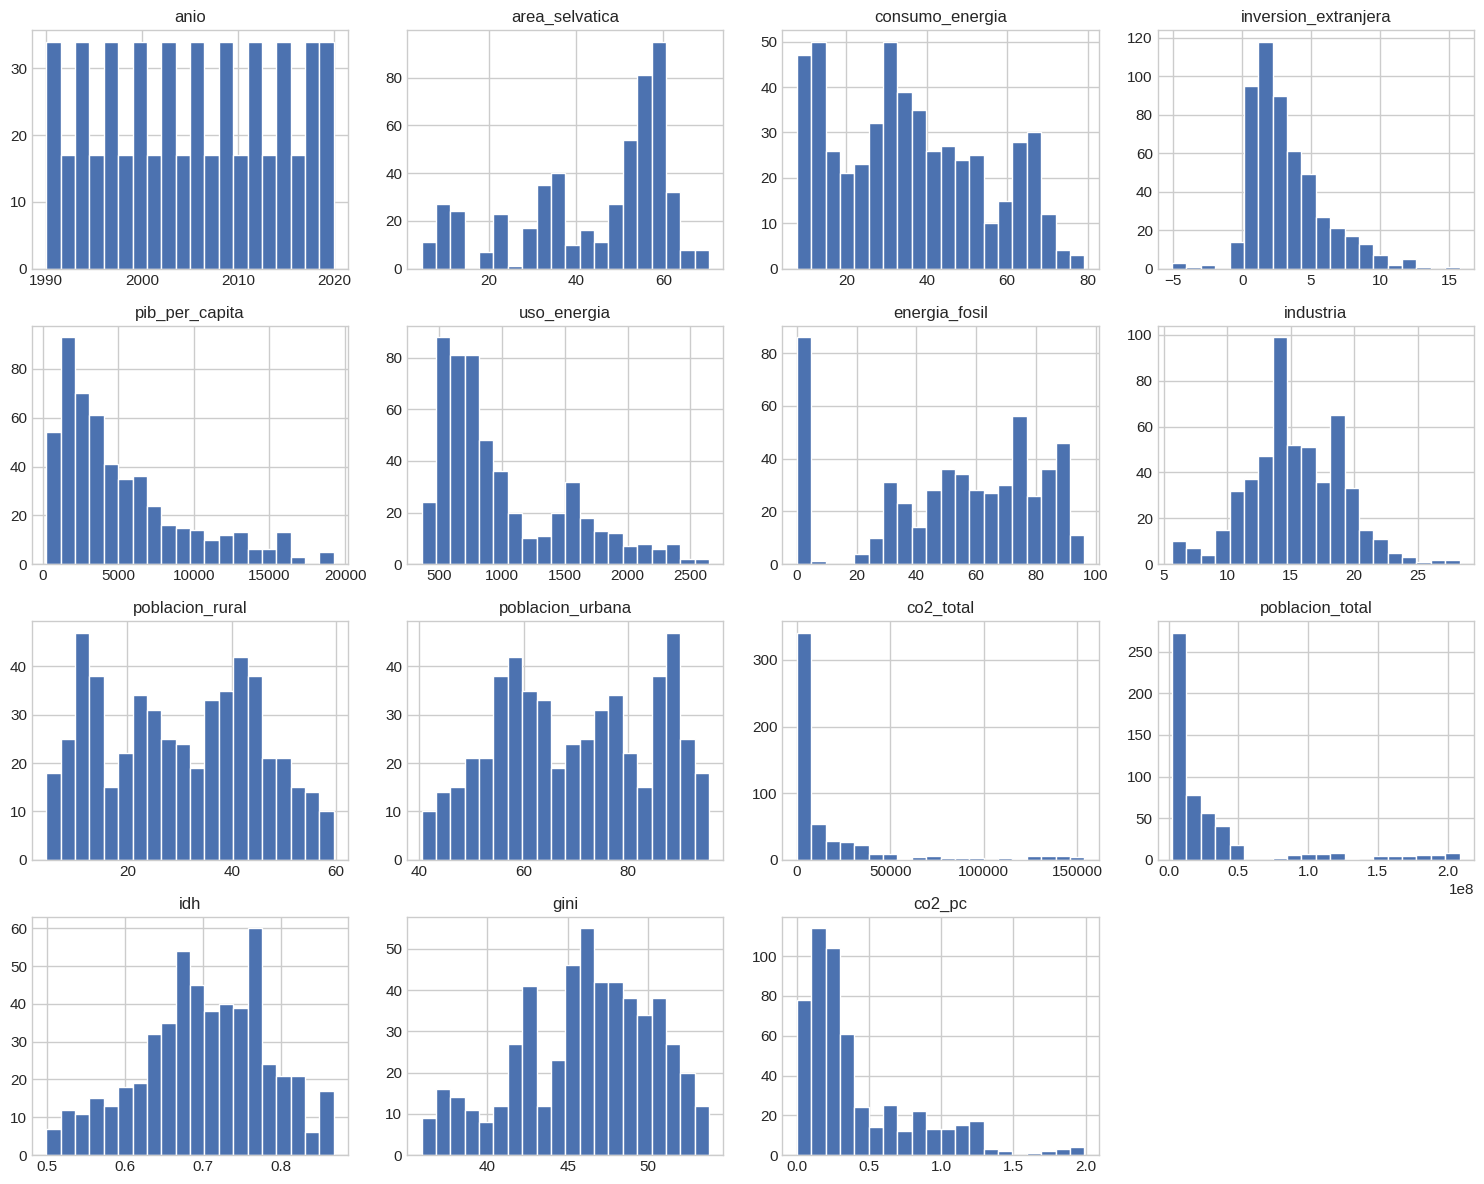

In [ ]:
df_al[num_vars].hist(bins=20, figsize=(15, 12))
plt.tight_layout()
plt.show()

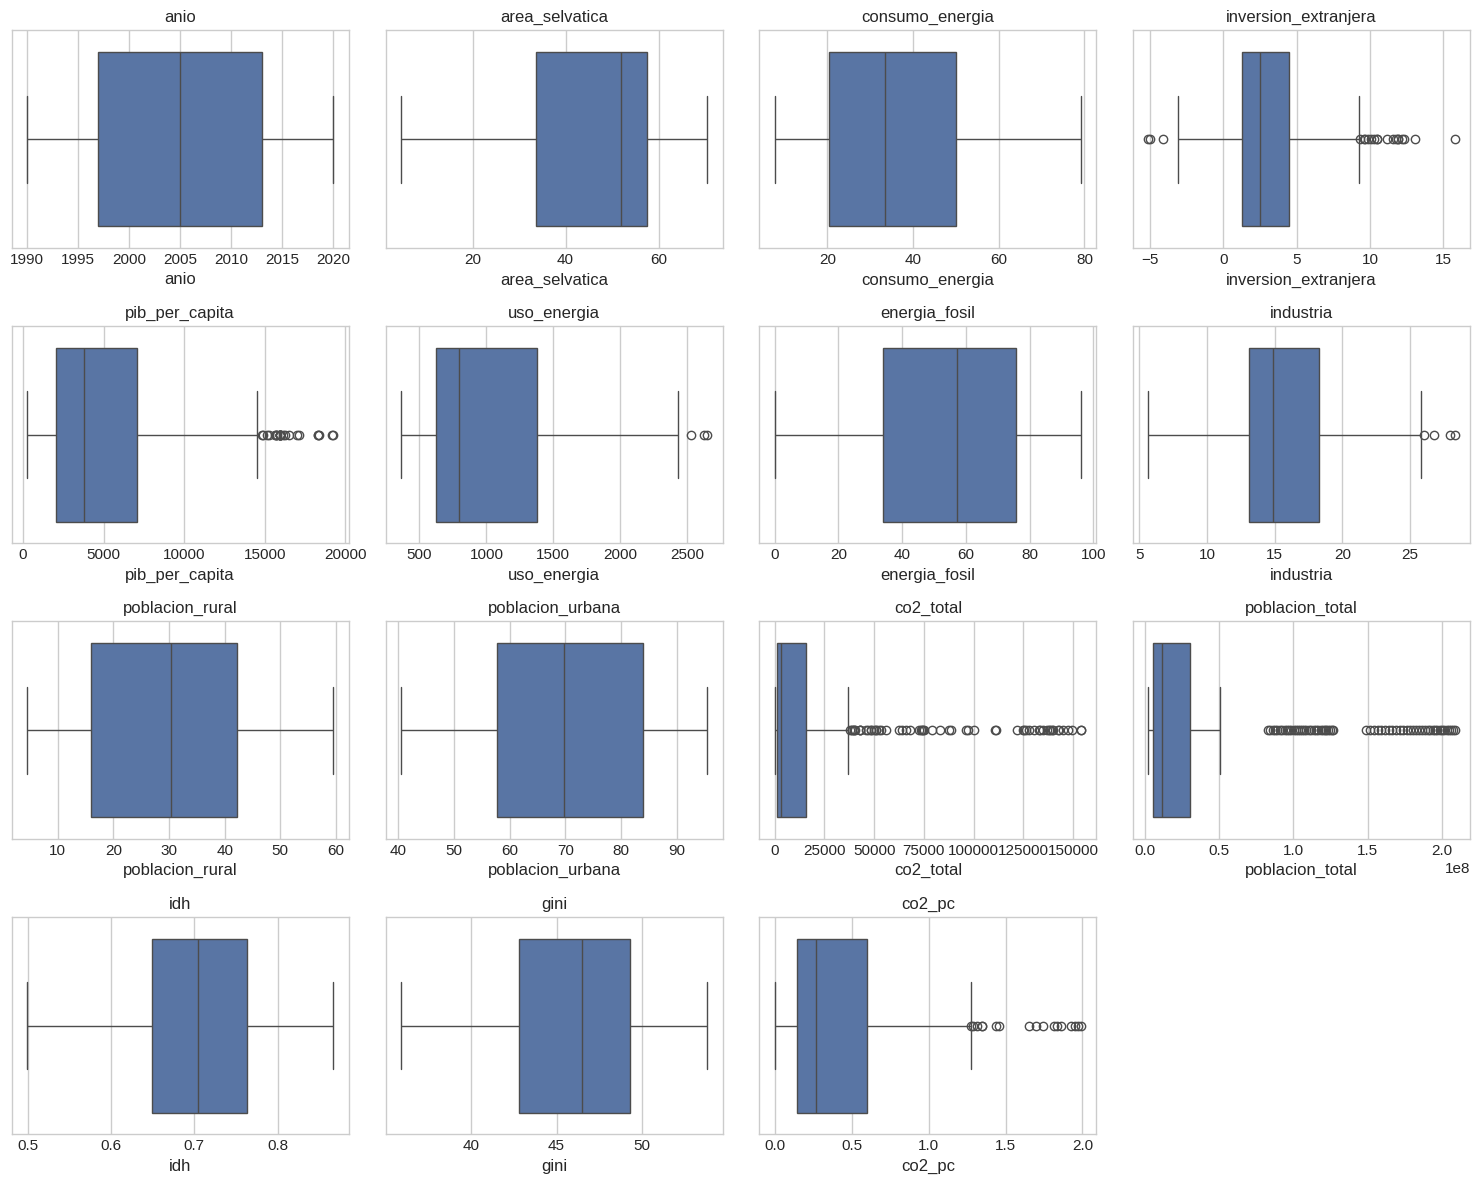

In [ ]:
plt.figure(figsize=(15,12))
for i, col in enumerate(num_vars):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df_al[col])
    plt.title(col)
plt.tight_layout()
plt.show()


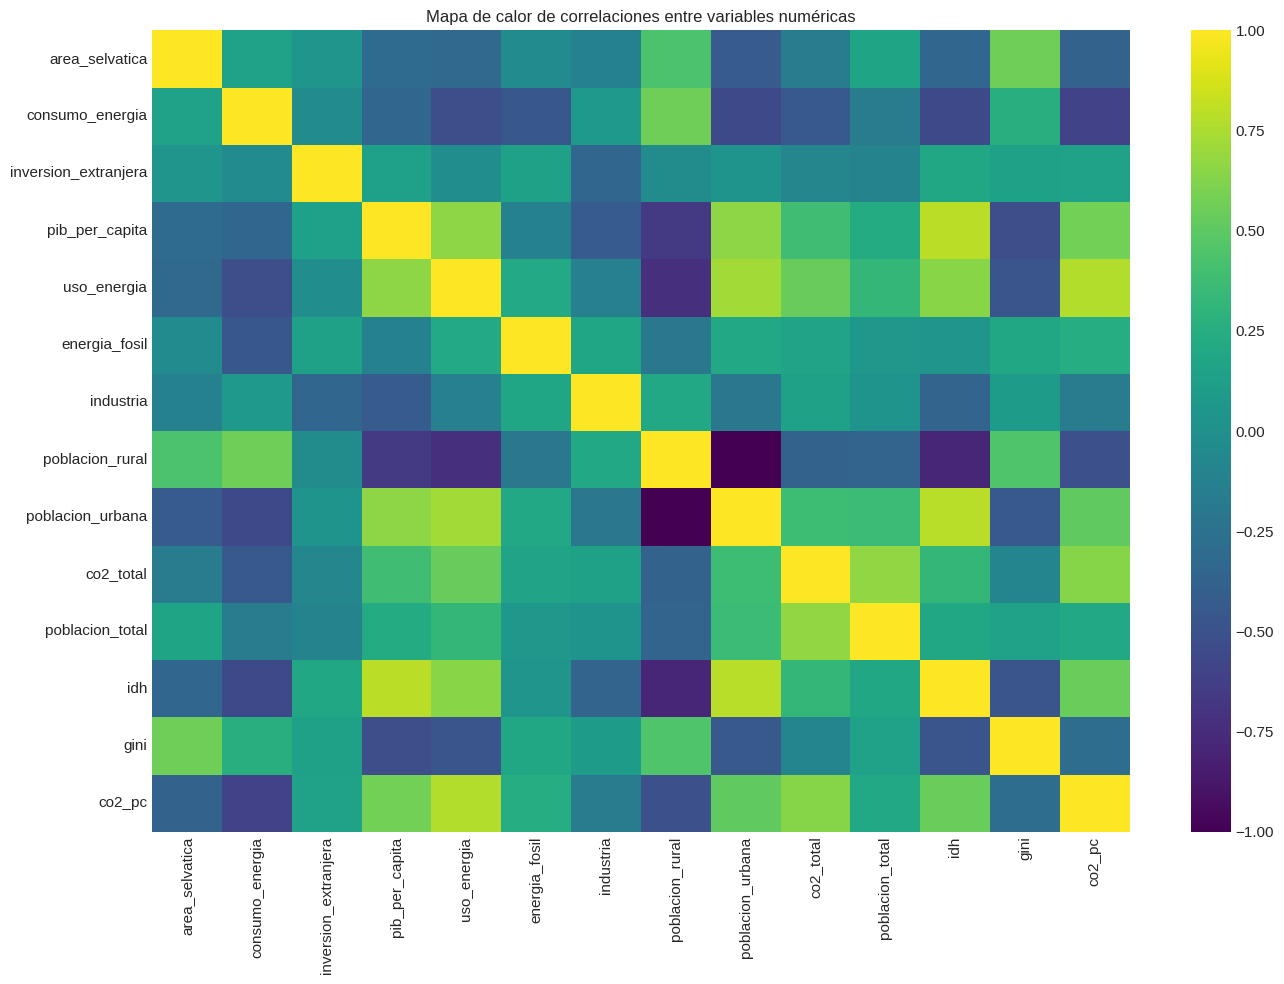


Correlaciones de cada variable con CO₂ per cápita:

co2_pc                  1.000000
uso_energia             0.769208
co2_total               0.639809
pib_per_capita          0.576131
idh                     0.542898
poblacion_urbana        0.511041
energia_fosil           0.242031
poblacion_total         0.201610
inversion_extranjera    0.152530
industria              -0.174603
gini                   -0.291213
area_selvatica         -0.380771
poblacion_rural        -0.511041
consumo_energia        -0.607028
Name: co2_pc, dtype: float64


/tmp/ipython-input-3435755325.py:47: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3435755325.py:48: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.savefig(f"anexo4_scatter_{v}.png")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


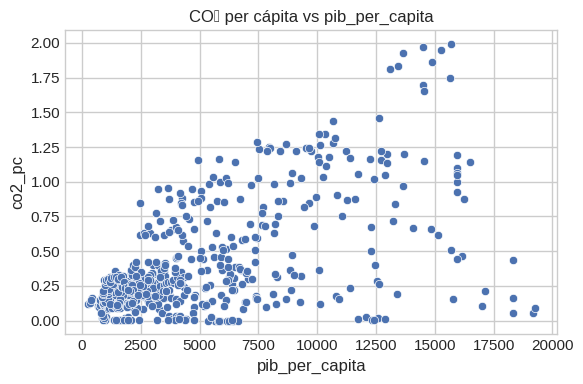

/tmp/ipython-input-3435755325.py:47: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3435755325.py:48: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.savefig(f"anexo4_scatter_{v}.png")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


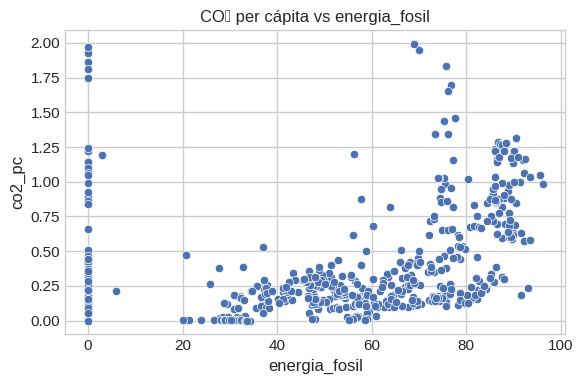

/tmp/ipython-input-3435755325.py:47: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3435755325.py:48: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.savefig(f"anexo4_scatter_{v}.png")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


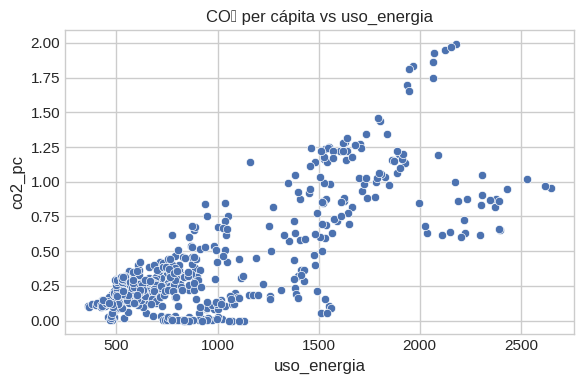

/tmp/ipython-input-3435755325.py:47: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3435755325.py:48: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.savefig(f"anexo4_scatter_{v}.png")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


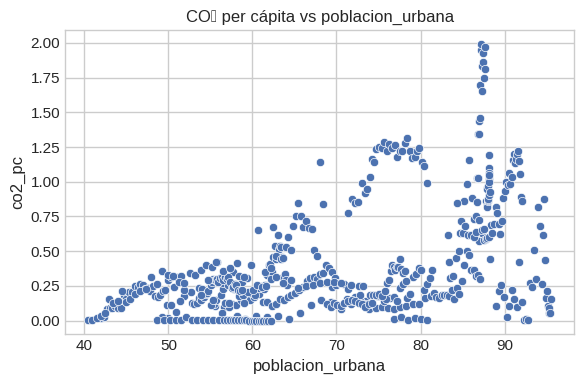

/tmp/ipython-input-3435755325.py:47: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3435755325.py:48: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.savefig(f"anexo4_scatter_{v}.png")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


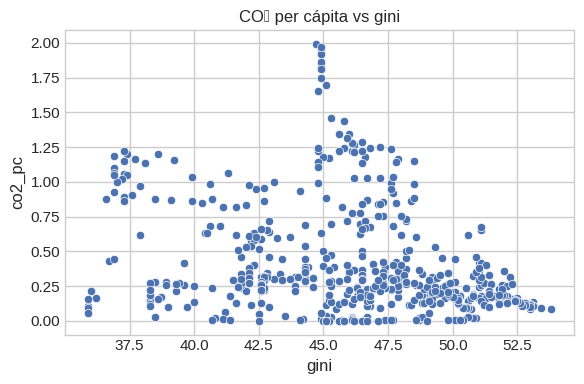

/tmp/ipython-input-3435755325.py:47: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3435755325.py:48: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.savefig(f"anexo4_scatter_{v}.png")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


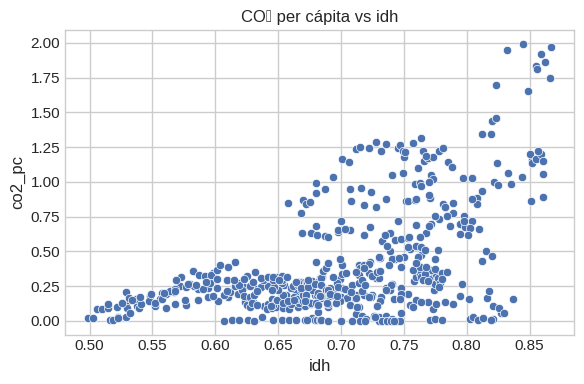

In [ ]:
# --- PASO 3: Análisis Bivariado ---

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# solo variables numéricas
num_vars = df_al.select_dtypes(include=['float64', 'int64'])
num_vars = num_vars.drop(columns=['anio'], errors='ignore')


# 1. Matriz de correlación


corr = num_vars.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=False, cmap='viridis')
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.tight_layout()
plt.savefig("anexo3_matriz_correlacion.png")
plt.show()


# 2. Correlación con CO2 per cápita


corr_co2 = corr['co2_pc'].sort_values(ascending=False)
print("\nCorrelaciones de cada variable con CO₂ per cápita:\n")
print(corr_co2)


# 3. Diagramas de dispersión con CO2_pc


vars_interes = [
    'pib_per_capita', 'energia_fosil', 'uso_energia',
    'poblacion_urbana', 'gini', 'idh'
]

for v in vars_interes:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_al, x=v, y='co2_pc')
    plt.title(f"CO₂ per cápita vs {v}")
    plt.tight_layout()
    plt.savefig(f"anexo4_scatter_{v}.png")
    plt.show()


In [ ]:
variables_modelo = [
 'area_selvatica','consumo_energia','inversion_extranjera','pib_per_capita',
 'uso_energia','energia_fosil','industria','poblacion_rural',
 'poblacion_urbana','co2_total','poblacion_total','idh','gini','co2_pc'
]
df_model = df_al[variables_modelo].copy()
df_model.shape


(527, 14)

In [ ]:
corr = df_model.corr()
# Mostrar pares con alta correlación
high_corr = []
for i in corr.columns:
    for j in corr.columns:
        if i!=j and abs(corr.loc[i,j])>=0.8:
            high_corr.append((i,j,corr.loc[i,j]))
high_corr = list(set(tuple(sorted((a,b))) + (round(c,3),) for a,b,c in high_corr))
high_corr, corr


([('poblacion_rural', 'poblacion_urbana', np.float64(-1.0))],
                       area_selvatica  consumo_energia  inversion_extranjera  \
 area_selvatica              1.000000         0.148857              0.042572   
 consumo_energia             0.148857         1.000000             -0.046384   
 inversion_extranjera        0.042572        -0.046384              1.000000   
 pib_per_capita             -0.312258        -0.346507              0.131145   
 uso_energia                -0.325145        -0.519196             -0.016486   
 energia_fosil              -0.044376        -0.456267              0.135218   
 industria                  -0.132113         0.081889             -0.343051   
 poblacion_rural             0.433318         0.557057             -0.036131   
 poblacion_urbana           -0.433318        -0.557057              0.036131   
 co2_total                  -0.171565        -0.448529             -0.073343   
 poblacion_total             0.165285        -0.169704    

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_model.drop(columns=['co2_pc']).dropna()
vif = pd.DataFrame()
vif['variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values('VIF', ascending=False)
print(vif)
vif.to_csv("vif_table.csv", index=False)


                variable         VIF
8       poblacion_urbana  403.336251
7        poblacion_rural   75.856196
11                   idh    5.187463
3         pib_per_capita    4.554874
9              co2_total    4.242886
10       poblacion_total    3.634490
4            uso_energia    3.261069
1        consumo_energia    3.068855
12                  gini    2.549024
0         area_selvatica    2.435617
5          energia_fosil    1.920039
6              industria    1.758367
2   inversion_extranjera    1.356656
